# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# data provided by Udacity

training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_test.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
import numpy as np

labels = np.unique(np.concatenate((y_train, y_valid, y_test)))

n_classes = labels.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Total number of examples =", n_train + n_validation + n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Total number of examples = 51839
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
# Display sign ids with their names

import pandas as pd

sign_names_df = pd.read_csv('./signnames.csv', index_col = 'ClassId')

sign_names_df

SignName
ClassId                                                   
0                                     Speed limit (20km/h)
1                                     Speed limit (30km/h)
2                                     Speed limit (50km/h)
3                                     Speed limit (60km/h)
4                                     Speed limit (70km/h)
5                                     Speed limit (80km/h)
6                              End of speed limit (80km/h)
7                                    Speed limit (100km/h)
8                                    Speed limit (120km/h)
9                                               No passing
10            No passing for vehicles over 3.5 metric tons
11                   Right-of-way at the next intersection
12                                           Priority road
13                                                   Yield
14                                                    Stop
15                                             No vehicles
16                Vehicles over 3.5 metric tons prohibited
17                                                No entry
18                                         General caution
19                             Dangerous curve to the left
20                            Dangerous curve to the right
21                                            Double curve
22                                              Bumpy road
23                                           Slippery road
24                               Road narrows on the right
25                                               Road work
26                                         Traffic signals
27                                             Pedestrians
28                                       Children crossing
29                                       Bicycles crossing
30                                      Beware of ice/snow
31                                   Wild animals crossing
32                     End of all speed and passing limits
33                                        Turn right ahead
34                                         Turn left ahead
35                                              Ahead only
36                                    Go straight or right
37                                     Go straight or left
38                                              Keep right
39                                               Keep left
40                                    Roundabout mandatory
41                                       End of no passing
42       End of no passing by vehicles over 3.5 metric ...

In [4]:
# Explore train dataset: display class ids

train_df = pd.DataFrame(data = y_train, columns = ['class'])
train_df = pd.merge(train_df, sign_names_df, left_on='class', right_on='ClassId')

train_df

class           SignName
0         41  End of no passing
1         41  End of no passing
2         41  End of no passing
3         41  End of no passing
4         41  End of no passing
...      ...                ...
34794     25          Road work
34795     25          Road work
34796     25          Road work
34797     25          Road work
34798     25          Road work

[34799 rows x 2 columns]

In [5]:
# Explore train dataset: class distribution

train_stats = train_df[['class', 'SignName']].groupby(['class', 'SignName']).size().reset_index(name='counts').sort_values(['counts'])

train_stats

class                                           SignName  counts
0       0                               Speed limit (20km/h)     180
37     37                                Go straight or left     180
19     19                        Dangerous curve to the left     180
32     32                End of all speed and passing limits     210
27     27                                        Pedestrians     210
41     41                                  End of no passing     210
42     42  End of no passing by vehicles over 3.5 metric ...     210
24     24                          Road narrows on the right     240
29     29                                  Bicycles crossing     240
39     39                                          Keep left     270
21     21                                       Double curve     270
40     40                               Roundabout mandatory     300
20     20                       Dangerous curve to the right     300
36     36                               Go straight or right     330
22     22                                         Bumpy road     330
6       6                        End of speed limit (80km/h)     360
16     16           Vehicles over 3.5 metric tons prohibited     360
34     34                                    Turn left ahead     360
30     30                                 Beware of ice/snow     390
23     23                                      Slippery road     450
28     28                                  Children crossing     480
26     26                                    Traffic signals     540
15     15                                        No vehicles     540
33     33                                   Turn right ahead     599
14     14                                               Stop     690
31     31                              Wild animals crossing     690
17     17                                           No entry     990
18     18                                    General caution    1080
35     35                                         Ahead only    1080
11     11              Right-of-way at the next intersection    1170
3       3                               Speed limit (60km/h)    1260
8       8                              Speed limit (120km/h)    1260
7       7                              Speed limit (100km/h)    1290
9       9                                         No passing    1320
25     25                                          Road work    1350
5       5                               Speed limit (80km/h)    1650
4       4                               Speed limit (70km/h)    1770
10     10       No passing for vehicles over 3.5 metric tons    1800
38     38                                         Keep right    1860
12     12                                      Priority road    1890
13     13                                              Yield    1920
1       1                               Speed limit (30km/h)    1980
2       2                               Speed limit (50km/h)    2010

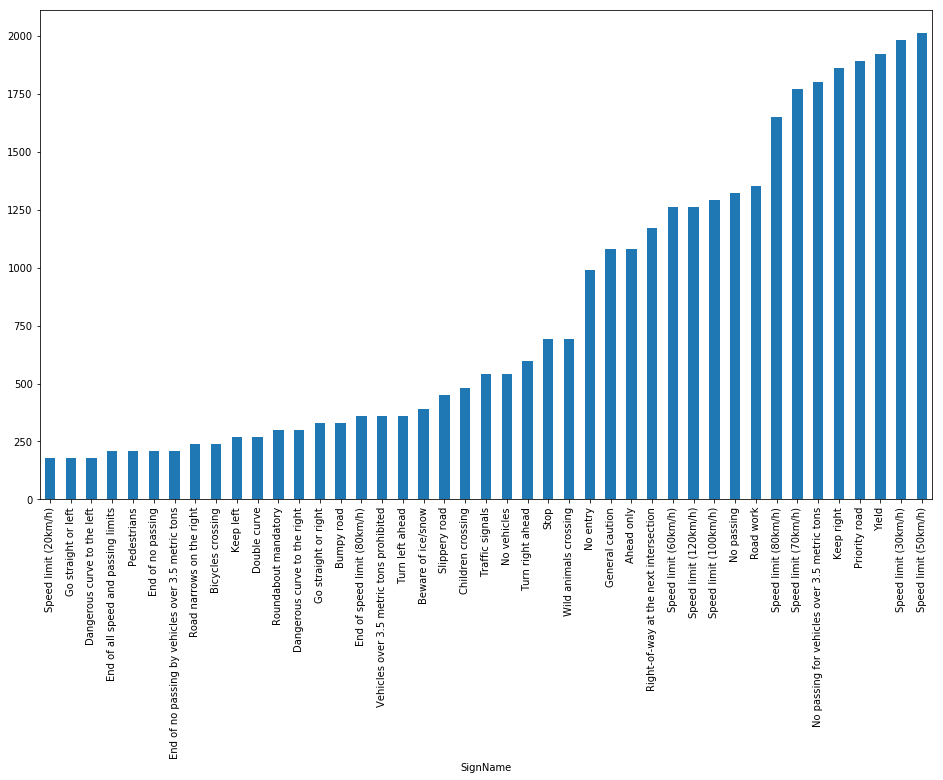

In [6]:
train_stats.plot.bar(x='SignName', y='counts', figsize=(16,9), legend=False)

# Findinds
1. More than half of classes in test dataset are represented by less than 1000 examples - dataset is very small
2. Dataset is very unbalanced - 9 classes are represented by less than 250 examples and 8 classes are represented by more than 1500 examples
3. Sign distributions does not resemble real life (i've been visiting Germany driving for 2 weeks) - for example Wild animals crossing is represented by 690 examples while Pedestrians are represented by 210 examples

In [7]:
# Balance classes - calculate class weights for futher use in model training 

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights

array([4.49599483, 0.4087268 , 0.4026264 , 0.64228498, 0.45721981,
       0.49047216, 2.24799742, 0.62734812, 0.64228498, 0.6130902 ,
       0.44959948, 0.69169151, 0.42818998, 0.42149952, 1.17286822,
       1.49866494, 2.24799742, 0.81745361, 0.74933247, 4.49599483,
       2.6975969 , 2.99732989, 2.45236082, 1.79839793, 3.37199612,
       0.59946598, 1.49866494, 3.85370986, 1.68599806, 3.37199612,
       2.07507454, 1.17286822, 3.85370986, 1.3510502 , 2.24799742,
       0.74933247, 2.45236082, 4.49599483, 0.43509627, 2.99732989,
       2.6975969 , 3.85370986, 3.85370986])

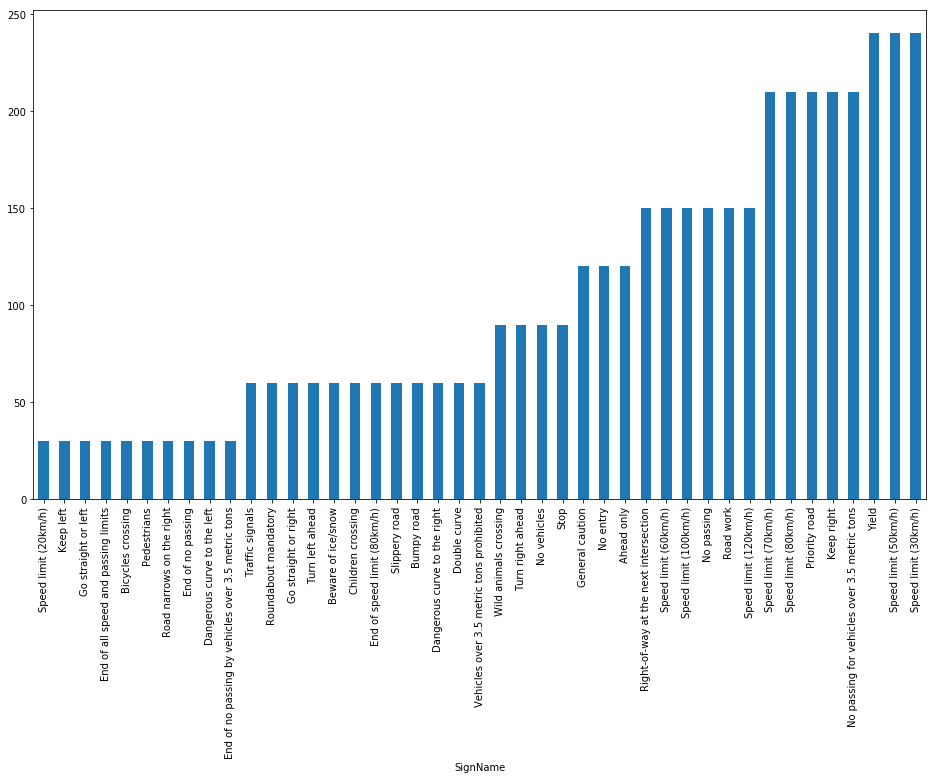

In [8]:
# Explore validation dataset 

valid_df = pd.DataFrame(data = y_valid, columns = ['class'])
valid_df = pd.merge(valid_df, sign_names_df, left_on='class', right_on='ClassId')


valid_stats = valid_df[['class', 'SignName']].groupby(['class', 'SignName']).size().reset_index(name='counts').sort_values(['counts'])
valid_stats.plot.bar(x='SignName', y='counts', figsize=(16,9), legend=False)

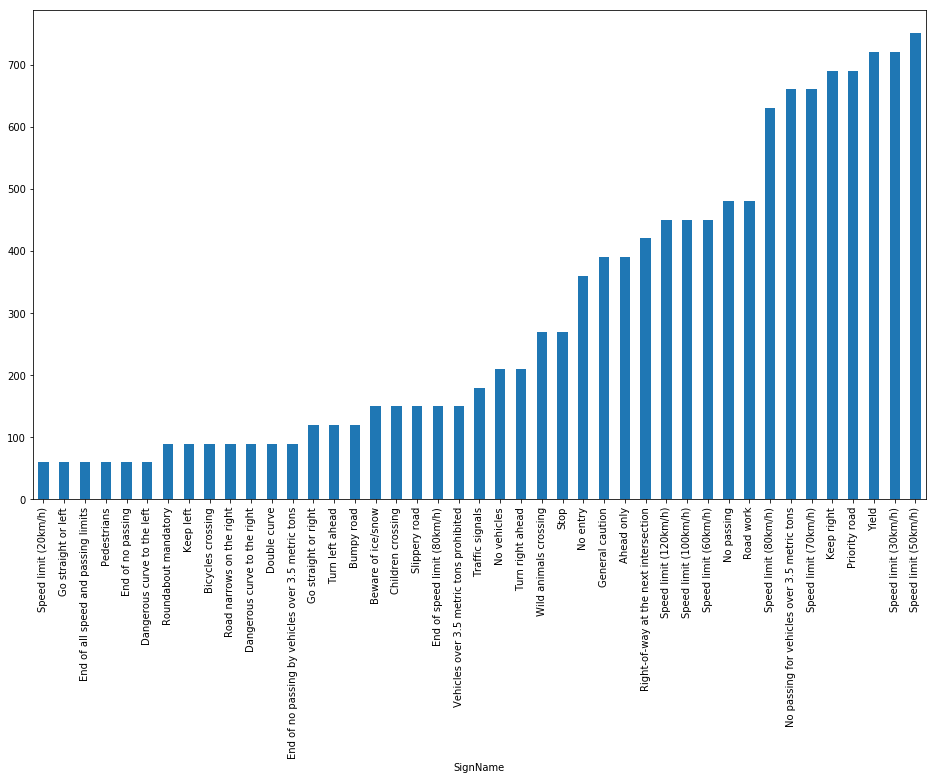

In [9]:
# Explore test dataset 

test_df = pd.DataFrame(data = y_test, columns = ['class'])
test_df = pd.merge(test_df, sign_names_df, left_on='class', right_on='ClassId')

test_stats = test_df[['class', 'SignName']].groupby(['class', 'SignName']).size().reset_index(name='counts').sort_values(['counts'])
test_stats.plot.bar(x='SignName', y='counts', figsize=(16,9), legend=False)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

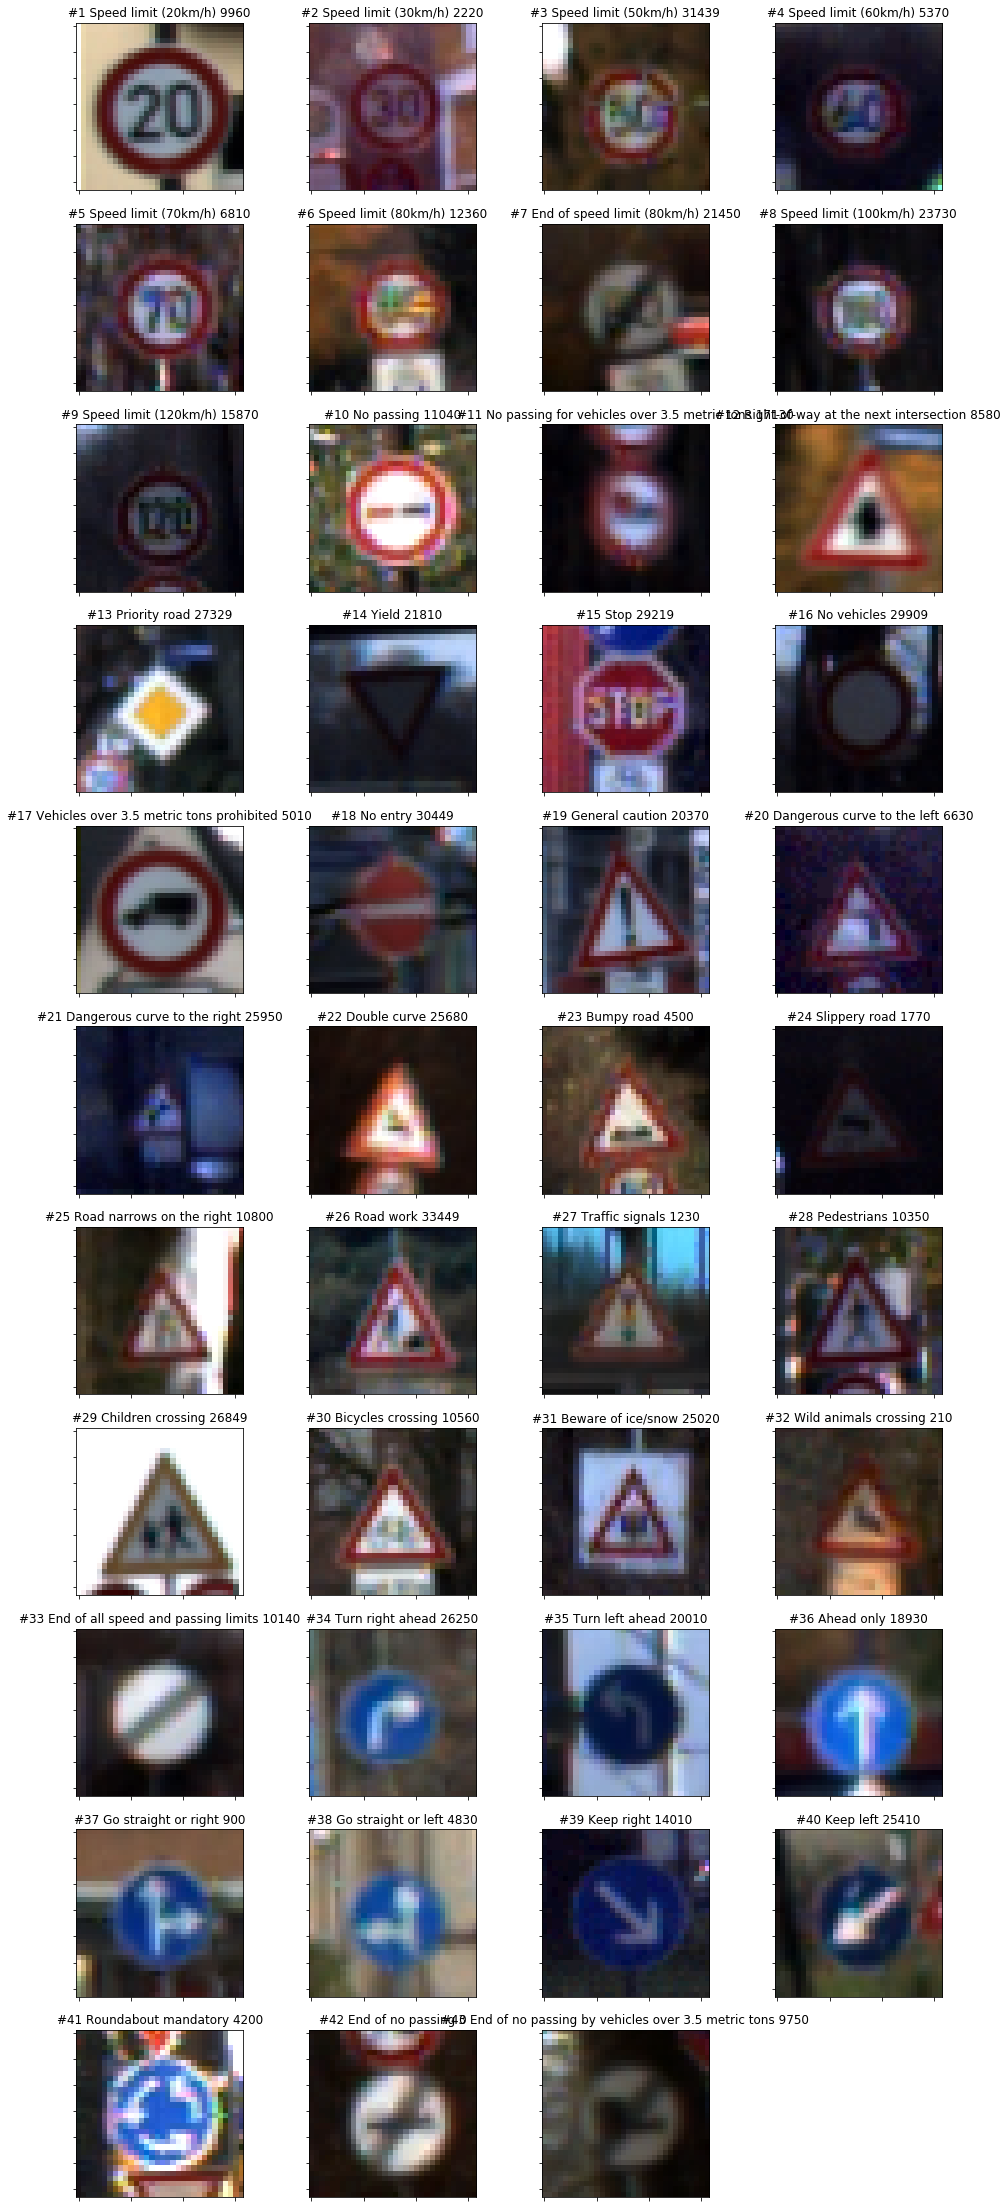

In [10]:
# Explore training dataset

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import math
from matplotlib import gridspec

cols = 4
rows = math.ceil(n_classes / cols)

fig = plt.figure(figsize=(16, 40))
gs = gridspec.GridSpec(rows, cols, width_ratios=[1, 1, 1, 1], wspace=0.0, hspace=1.0, top=0.95, bottom=0.05, left=0.17, right=0.845)

i = 1
for label in labels:    
    for j in range(y_train.shape[0]):            
        if y_train[j] == label:
            subplot = fig.add_subplot(rows, cols, i)
            subplot.set_xticklabels([])
            subplot.set_yticklabels([])
            label_name = sign_names_df.iloc[label]['SignName']
            subplot.set_title("#{} {} {}".format(i, label_name, j))
    
            img = X_train[j]
            img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
            plt.imshow(img)
            
            i += 1
            
            break
        
    
plt.show()

# Findings:
1. Some signs are dark (#14), some signs are bright (#41)
2. Some signs photos contain parts of other signs (#41, #42)
3. Some signs occupy almost whole photo (#17), some signs occupy relatively small part of photo (#13)
4. Some signs are rotated (#19)
5. Some signs are of good quality (#1), some signs are very pixelated (#6)

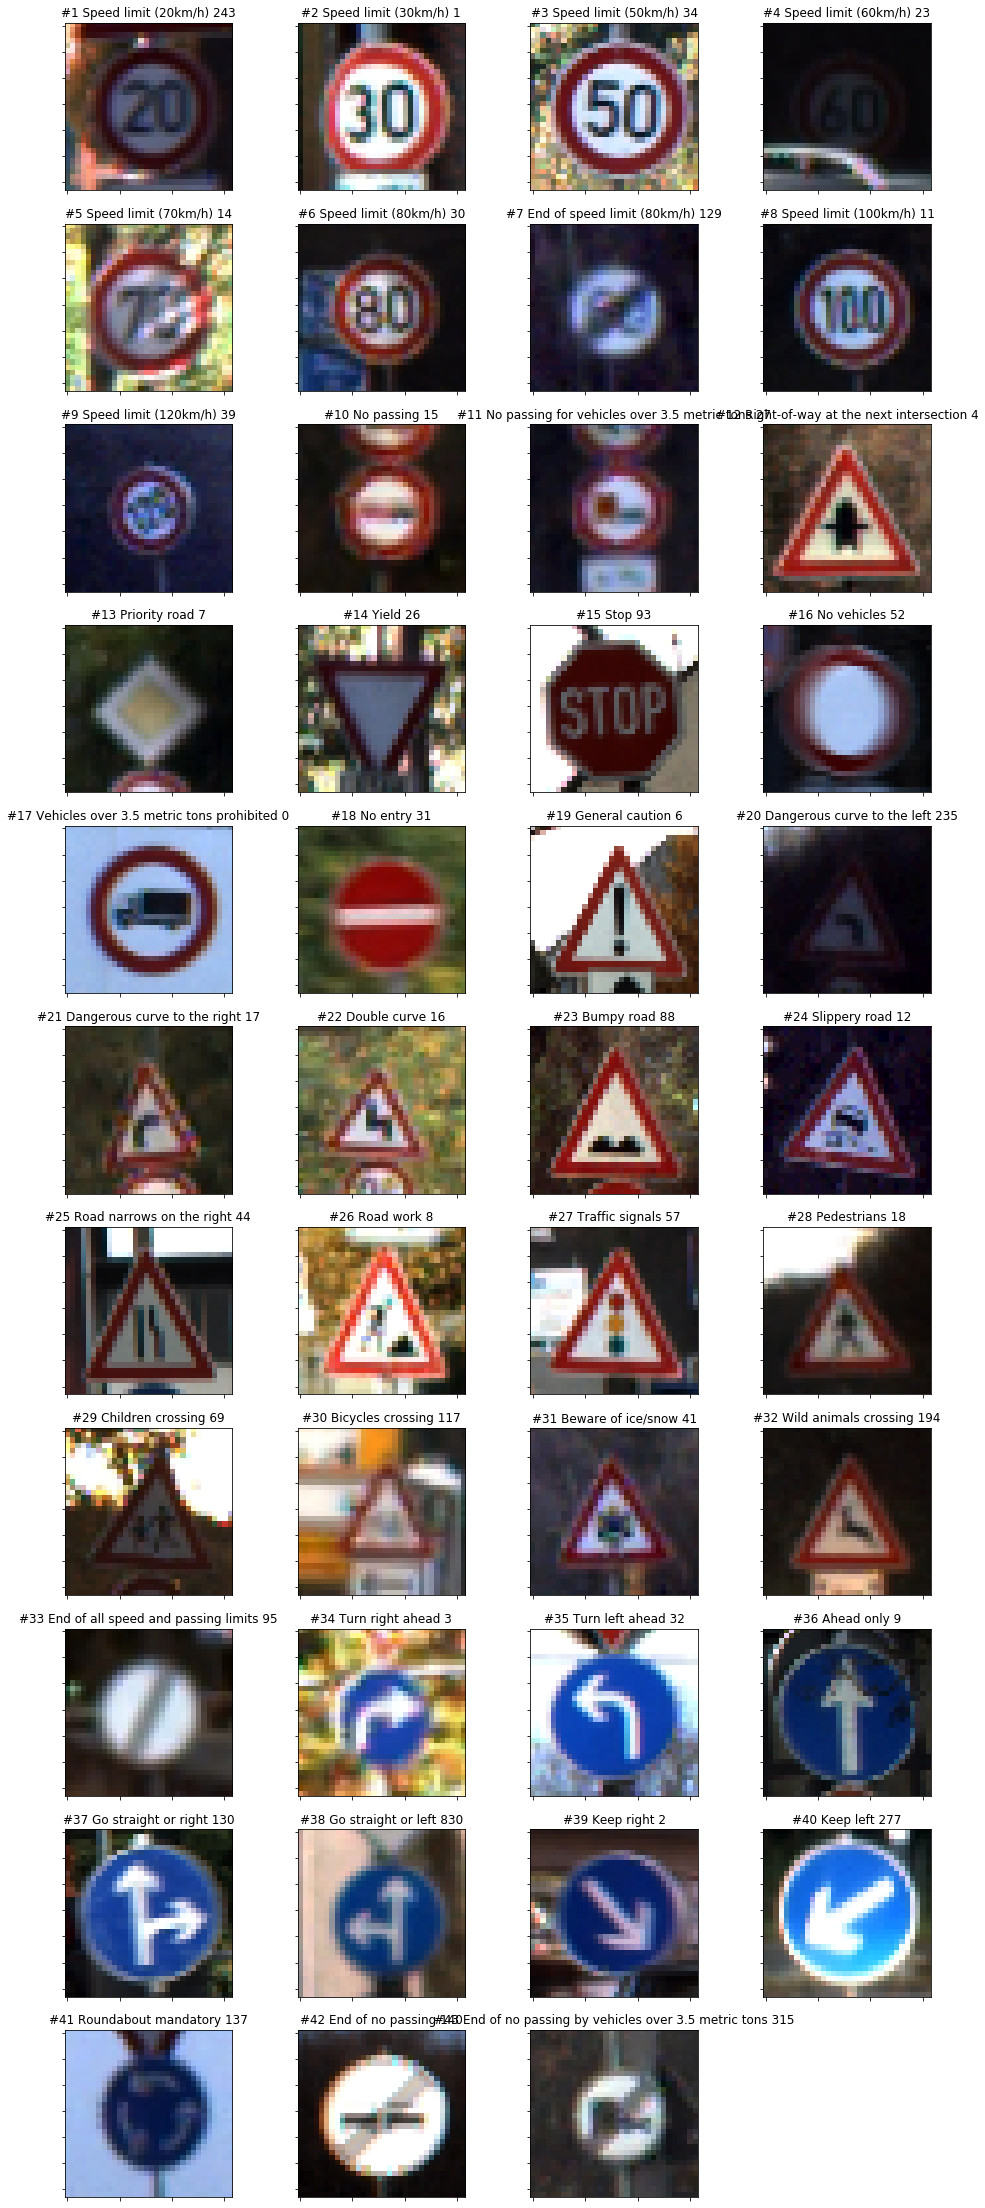

In [11]:
# Explore test dataset 

cols = 4
rows = math.ceil(n_classes / cols)

fig = plt.figure(figsize=(16, 40))
gs = gridspec.GridSpec(rows, cols, width_ratios=[1, 1, 1, 1], wspace=0.0, hspace=1.0, top=0.95, bottom=0.05, left=0.17, right=0.845)

i = 1
for label in labels:    
    for j in range(y_test.shape[0]):            
        if y_test[j] == label:
            subplot = fig.add_subplot(rows, cols, i)
            subplot.set_xticklabels([])
            subplot.set_yticklabels([])
            label_name = sign_names_df.iloc[label]['SignName']
            subplot.set_title("#{} {} {}".format(i, label_name, j))
    
            img = X_test[j]
            img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
            plt.imshow(img)
            
            i += 1
            
            break
        
    
plt.show()

# Findinds
1. There are shadows on some signs (#5, #6)
2. There are sunflares on some signs (#40)

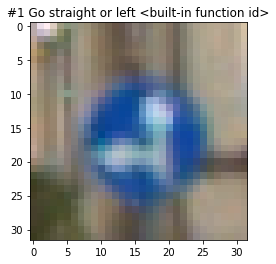

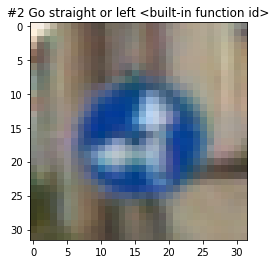

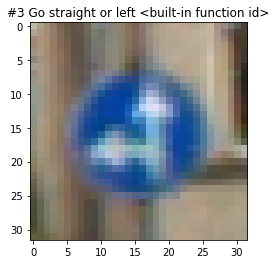

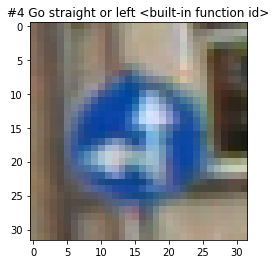

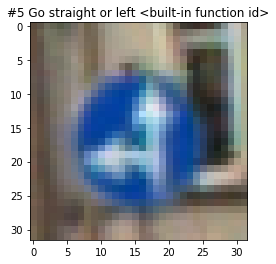

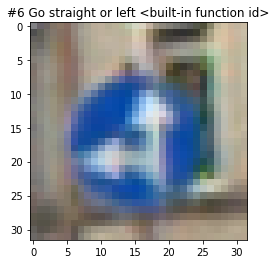

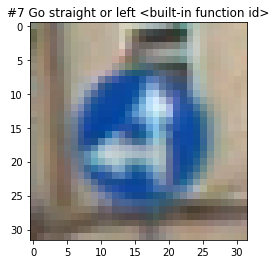

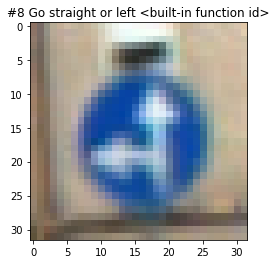

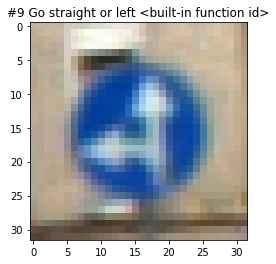

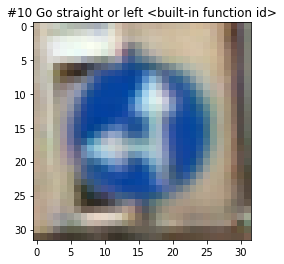

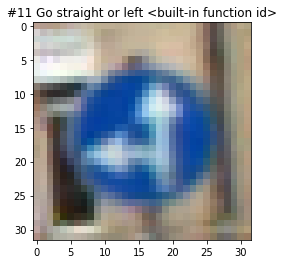

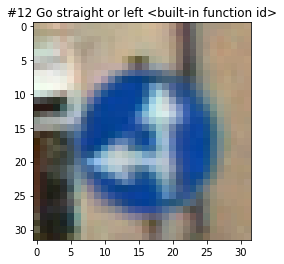

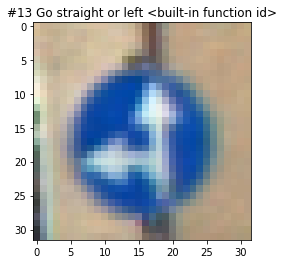

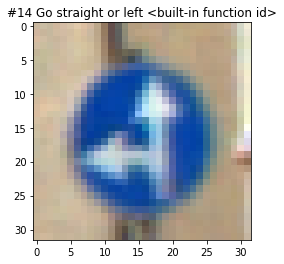

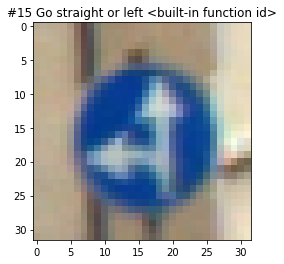

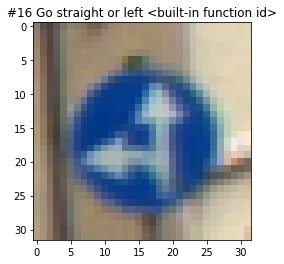

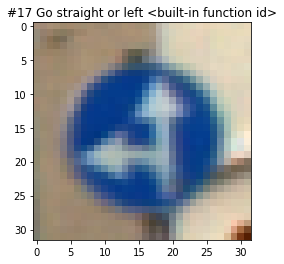

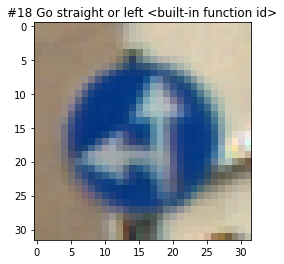

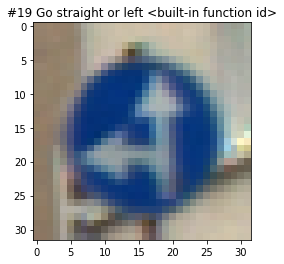

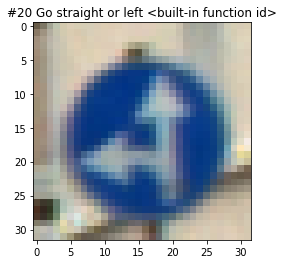

In [12]:
# What's inside of 30 km/h of train subset 
class_id = 37

images = [x for x, y in zip(X_train, y_train) if y == class_id]

for i, img in enumerate(images[:20]):
    plt.figure()
    label_name = sign_names_df.iloc[class_id]['SignName']
    plt.title("#{} {} {}".format(i+1, label_name, id))

    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    plt.imshow(img)
    
plt.show()

# Findings
1. Images were taken in series while car photographer was moving towards sign
2. Every next photo in single serie has better resolution than previous (since photographer moves towards sign). Original German Signs Dataset had additional feature - Serie #, but Udacity's dataset  does not provide this feature - it would be interesting to explore how model performs on whole dataset and, for example, on first 50% of images (low resolution) vs high 50% (high resolution) of each serie since there are a lot of cases when I cannot recognize sign class on first shots in serie. 

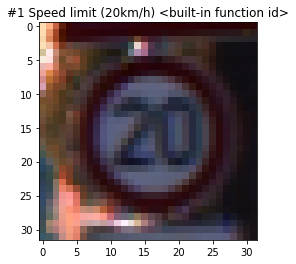

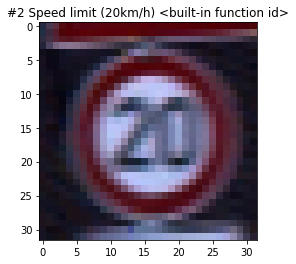

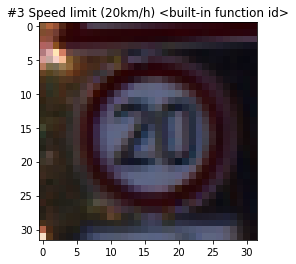

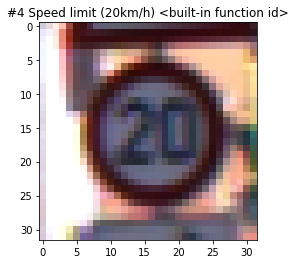

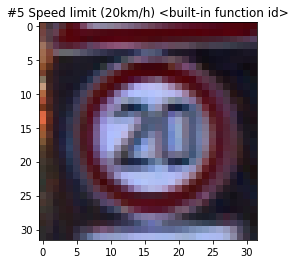

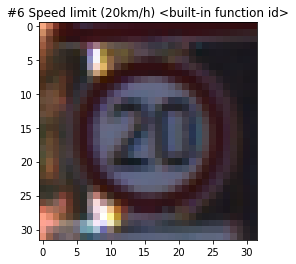

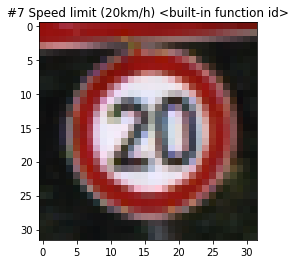

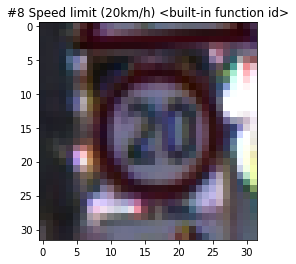

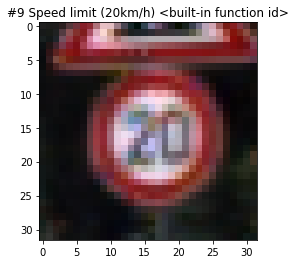

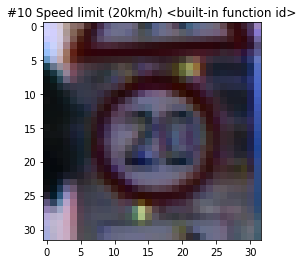

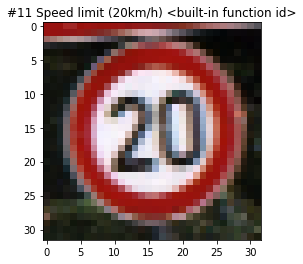

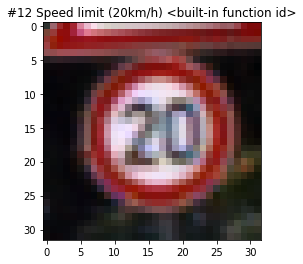

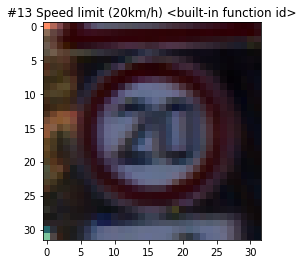

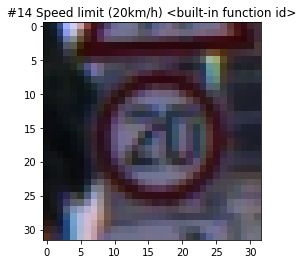

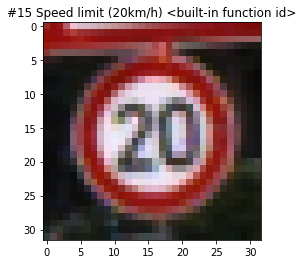

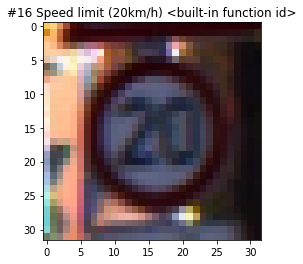

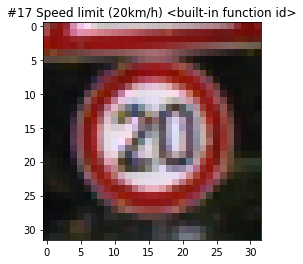

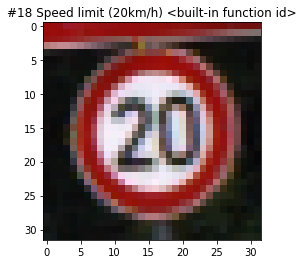

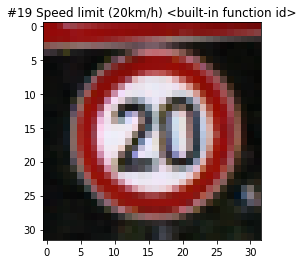

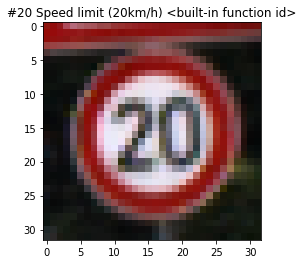

In [13]:
# What's inside of 20 km/h of test subset 
class_id = 0

images = [x for x, y in zip(X_test, y_test) if y == class_id]

for i, img in enumerate(images[:20]):
    plt.figure()
    label_name = sign_names_df.iloc[class_id]['SignName']
    plt.title("#{} {} {}".format(i+1, label_name, id))

    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    plt.imshow(img)
    
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [14]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2
import numpy as np
import tensorflow

# Normalize images

X_train = np.array([cv2.normalize(x, None, 0, 255, cv2.NORM_MINMAX) for x in X_train])
X_valid = np.array([cv2.normalize(x, None, 0, 255, cv2.NORM_MINMAX) for x in X_valid])
X_test = np.array([cv2.normalize(x, None, 0, 255, cv2.NORM_MINMAX) for x in X_test])

# Rescale images to 128x128 for better augmentation (smoother rotation, shadows etc)
original_image_size = 32
image_size = 128

X_train = np.array([cv2.resize(x, (int(image_size),int(image_size))) for x in X_train])
X_test = np.array([cv2.resize(x, (int(image_size),int(image_size))) for x in X_test])
X_valid = np.array([cv2.resize(x, (int(image_size),int(image_size))) for x in X_valid])

# Augment data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def generate_shadow_coordinates(imshape, figure_count=1):
    vertices_list=[]    
    for index in range(figure_count):        
        vertex=[]        
        for dimensions in range(np.random.randint(3,5)):           
            vertex.append((imshape[1]*np.random.uniform(), imshape[0]//3+imshape[0]*np.random.uniform()))        
        vertices = np.array([vertex], dtype=np.int32)         
        vertices_list.append(vertices)    
    return vertices_list
        
def add_shadows_and_sunflares(image, shadows_and_sunflares_count=1):
    image_HSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) 
       
    mask = np.zeros(image.shape)
  
    vertices_list = generate_shadow_coordinates(image.shape , shadows_and_sunflares_count) 
    
    shadow_intensity = random.uniform(0.7, 1.3) # best 0.7 .. 1.3
    
    for vertices in vertices_list:         
        cv2.fillPoly(mask, vertices, 1.0)        
        image_HSV[:,:,2][mask[:,:,0]==1.0] = np.clip(image_HSV[:,:,2][mask[:,:,0]==1.0] * shadow_intensity, 0, 255)  
  
    image_RGB = cv2.cvtColor(image_HSV, cv2.COLOR_HSV2RGB)
    return image_RGB

import random

def preprocess(img):
    shadows_and_sunflares_count = random.randint(0, 2)
    return add_shadows_and_sunflares(img, shadows_and_sunflares_count)

# Augment training data: rotate, zoom, shift up/down/left/right, sheer, brighter/darker, add shadows.
# Rescale from 0.255 to 0..1 for DNN model to be more stable

augment_data_generator = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.20,
    width_shift_range=0.20,
    height_shift_range=0.20,
    shear_range=0.15,
    fill_mode="wrap",
    rescale=1.0/255.0,
    brightness_range=(0.8, 1.2),
    preprocessing_function=preprocess
)

# Rescale validation data from 0.255 to 0..1 for DNN model to be more stable
pass_data_generator = tensorflow.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0
)

# Obtain one hot encodings for training and validation data
y_train_one_hot = np.array(tensorflow.keras.utils.to_categorical(y_train))
y_valid_one_hot = np.array(tensorflow.keras.utils.to_categorical(y_valid))

(20, 128, 128, 3)


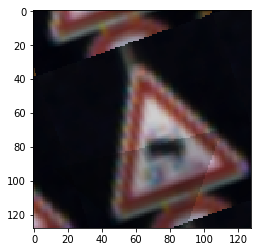

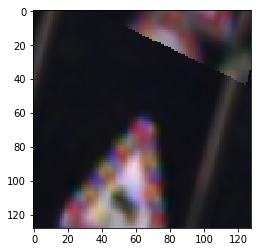

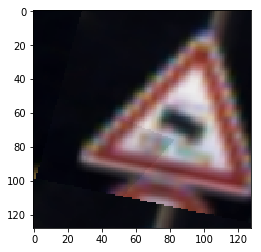

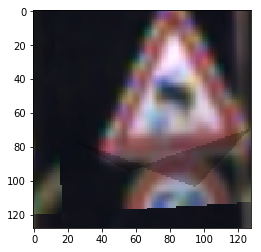

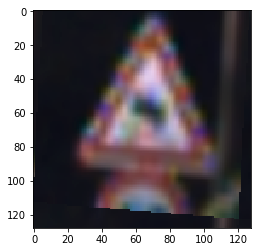

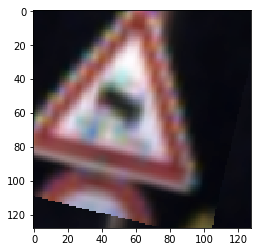

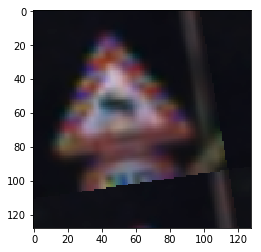

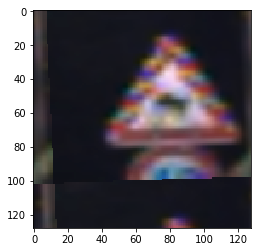

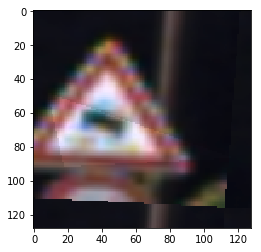

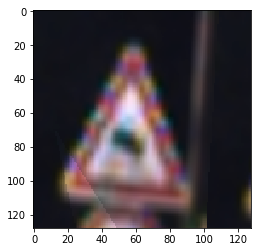

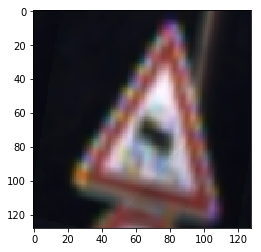

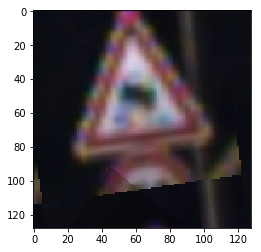

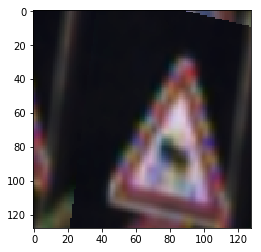

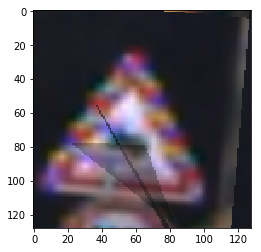

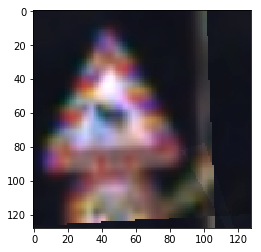

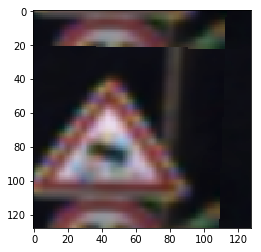

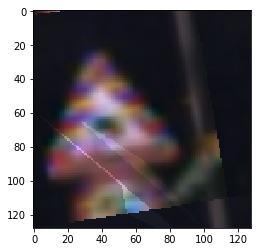

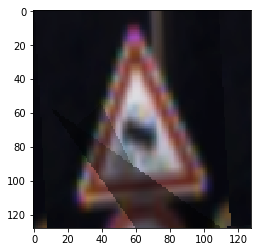

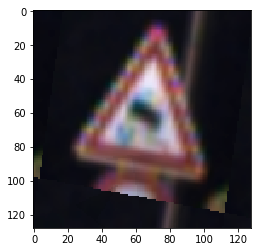

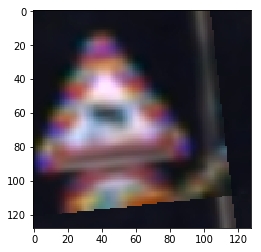

In [15]:
# Show augmented training images

n_samples = 10

batch = augment_data_generator.flow(X_train[2100:2120], shuffle=True)[0]

print(batch.shape)

for img in batch:
    plt.figure()
    plt.imshow(img)
    
plt.show()

### Model Architecture

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

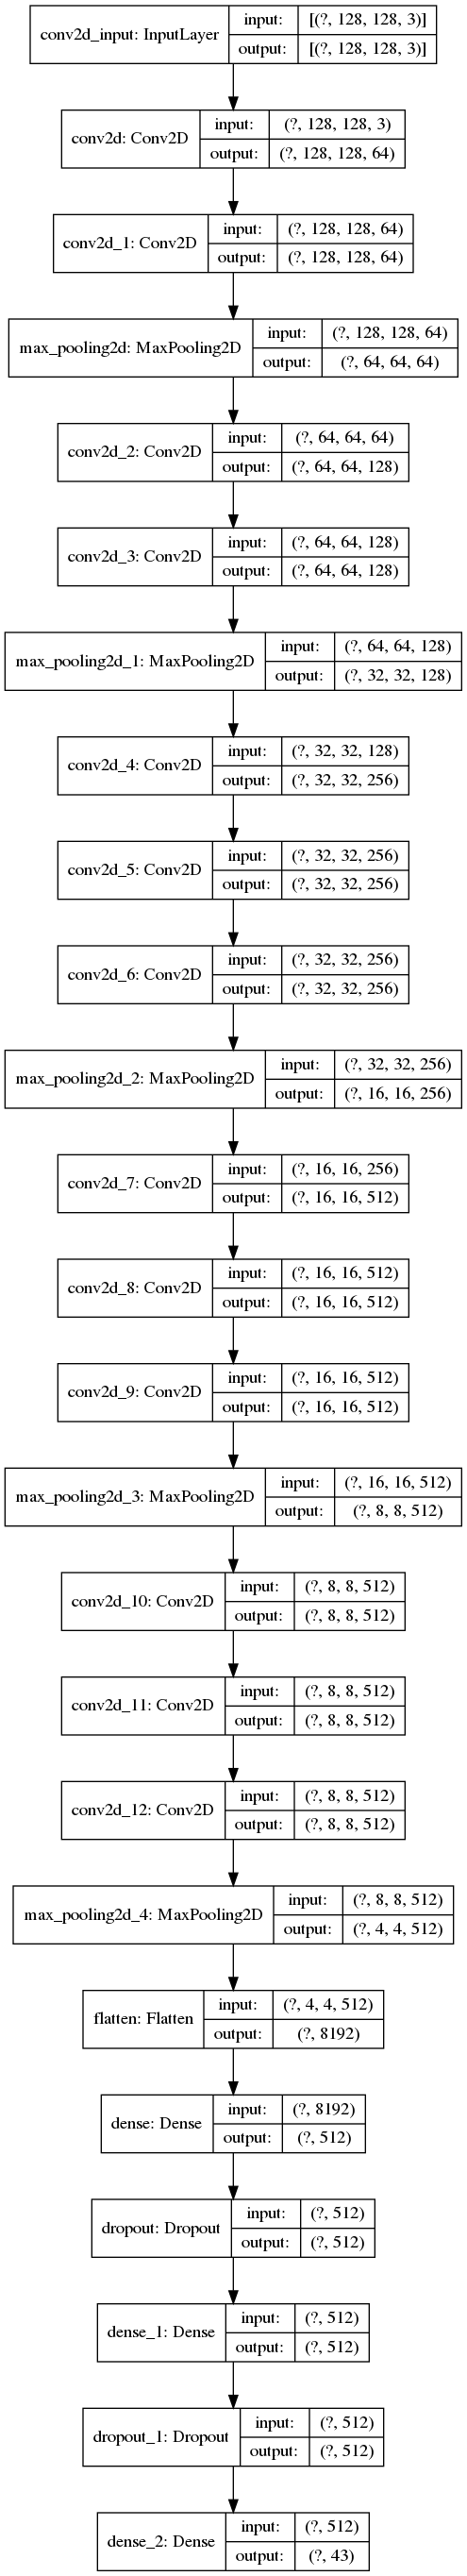

In [17]:
# base_model = tensorflow.keras.applications.vgg16.VGG16(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')
# # base_model.layers.pop(4)

# # base_model = tensorflow.keras.applications.xception.Xception(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')

# # inp = tensorflow.keras.layers.Input(shape=(image_size, image_size, 3))
# # resize = tensorflow.keras.layers.Lambda(lambda image: tensorflow.image.resize(image, (331, 331)))(inp)
# # base_model = tensorflow.keras.applications.NASNetLarge(input_tensor=inp, include_top=False, weights='imagenet')

# x = base_model.output
# x = tensorflow.keras.layers.Flatten()(x)
# x = tensorflow.keras.layers.Dense(512, activation='relu')(x)
# x = tensorflow.keras.layers.Dropout(0.5)(x)
# x = tensorflow.keras.layers.Dense(512, activation='relu')(x)
# x = tensorflow.keras.layers.Dropout(0.5)(x)
# predictions = tensorflow.keras.layers.Dense(n_classes, activation='softmax')(x)

# model = tensorflow.keras.Model(inputs=base_model.input, outputs=predictions)

# Create VGG-16 model

model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.Conv2D(input_shape=(image_size,image_size,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(tensorflow.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(tensorflow.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tensorflow.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tensorflow.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tensorflow.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tensorflow.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tensorflow.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tensorflow.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tensorflow.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tensorflow.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tensorflow.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tensorflow.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tensorflow.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tensorflow.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(tensorflow.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tensorflow.keras.layers.Flatten())
model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.5))
model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.5))
model.add(tensorflow.keras.layers.Dense(n_classes, activation='softmax'))

from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.00025), loss='categorical_crossentropy', metrics=['accuracy'])

# Show model picture
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

BATCH_SIZE = 64


In [19]:
try:
    model.load_weights('vgg16_best_weights.hdf5')
except:
    history = model.fit(
        augment_data_generator.flow(X_train, y_train_one_hot, batch_size=BATCH_SIZE),
        steps_per_epoch=math.ceil(len(X_train) / BATCH_SIZE),
        epochs=500,
        validation_data=pass_data_generator.flow(X_valid, y_valid_one_hot),
        verbose = 1,
        callbacks=[
            tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, min_delta=1e-4, mode='min'), 
            tensorflow.keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min'), 
            tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_delta=1e-4, mode='min')
        ],
       class_weight=class_weights
    )
    
    plt.figure()
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [20]:
# check model accuracy against test data
y_test_one_hot = tensorflow.keras.utils.to_categorical(y_test)

print('\n# Evaluate on test data')
results = model.evaluate(pass_data_generator.flow(X_test, y_test_one_hot))
print('test loss, test acc:', results)


# Evaluate on test data
  ...
    to  
  ['...']
395/395 [==============================] - 13s 32ms/step - loss: 0.1518 - accuracy: 0.9938
test loss, test acc: [0.1517907327709624, 0.99382424]


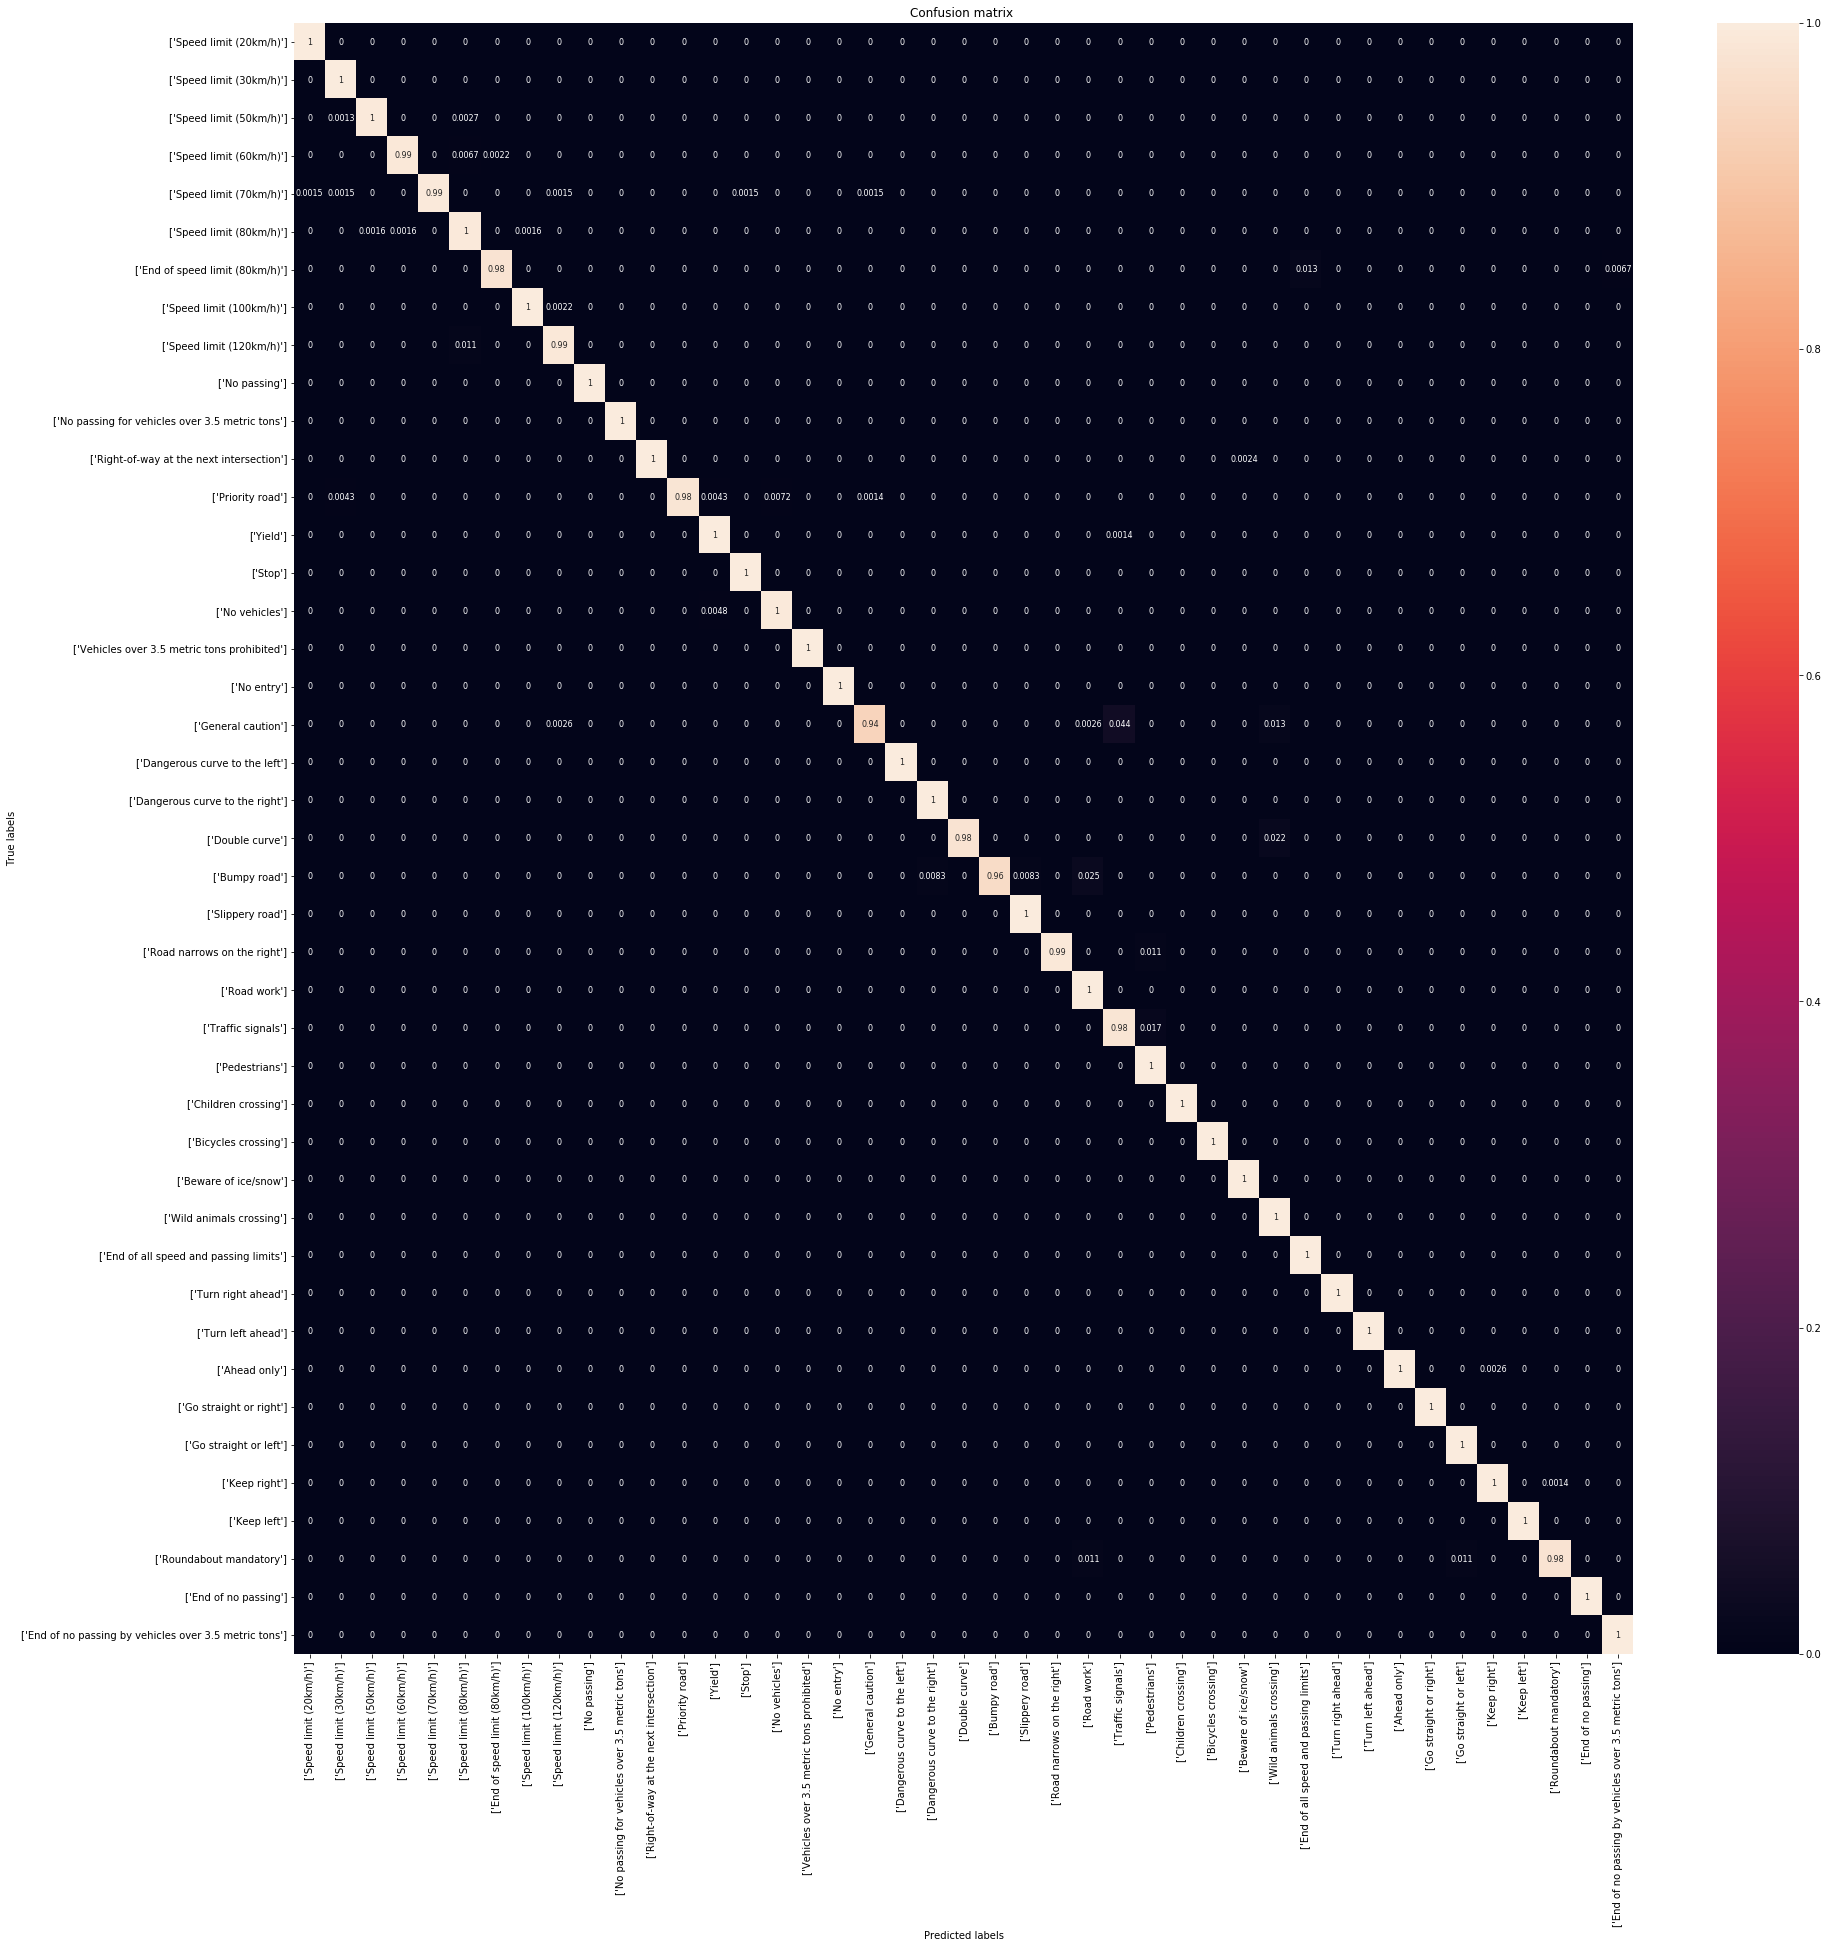

In [21]:
# Plot confusion matrix on test data

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

y_pred = model.predict(pass_data_generator.flow(x=X_test, y=y_test, shuffle=False))
y_pred_label = np.argmax(y_pred, axis=1)

cm = metrics.confusion_matrix(y_test, y_pred_label, normalize='true')

import seaborn as sn

plt.figure(num=None, figsize=(30, 30))

sn.heatmap(cm, annot=True, annot_kws={"size": 8}, xticklabels=sign_names_df[['SignName']].values, yticklabels=sign_names_df[['SignName']].values)

plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title('Confusion matrix ')

plt.show()

# Findings

Model confuses most:
1. General caution (6% wrong recognitions) with Traffic signals (4,4%)

In [22]:
# Plot wrong class predictions for test data

y_pred_proba = [value[index] for index, value in zip(y_test, y_pred)]

wrong_prediction_indices = [i for i, v in enumerate(y_pred_label) if y_pred_label[i] != y_test[i]]

/home/vmihaylov/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


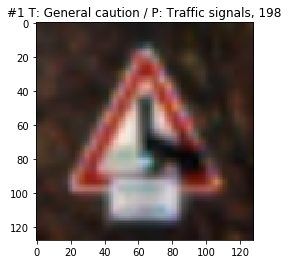

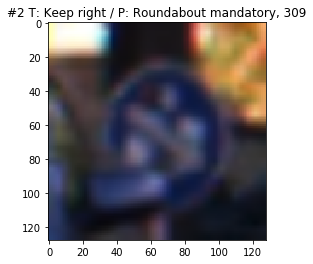

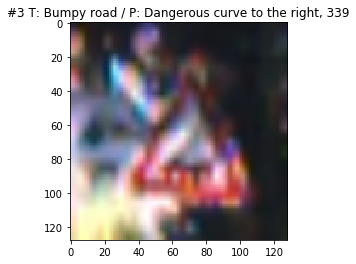

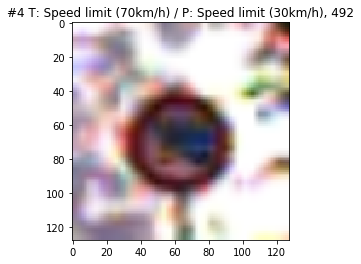

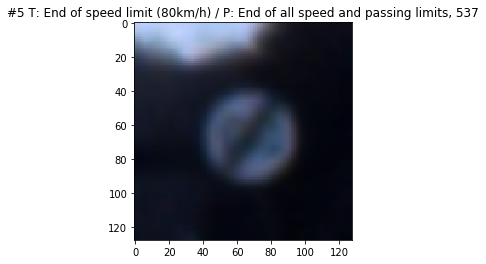

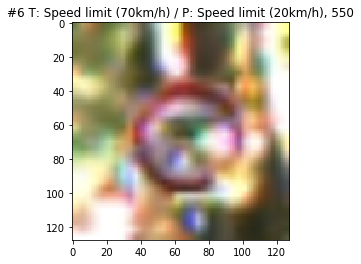

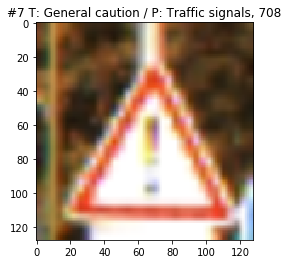

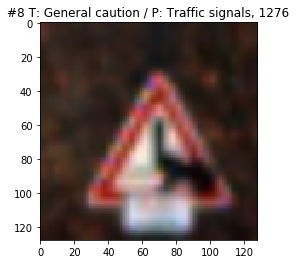

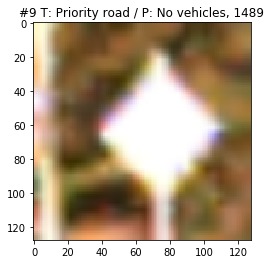

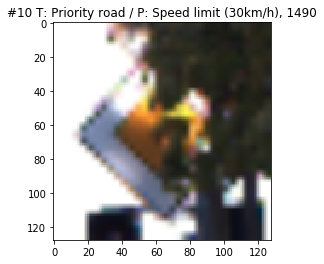

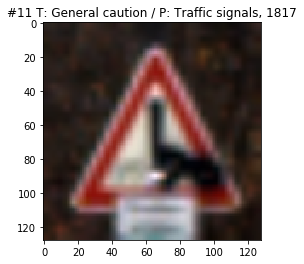

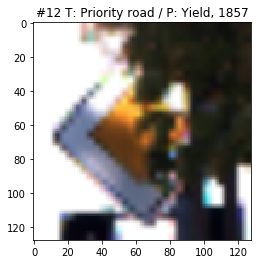

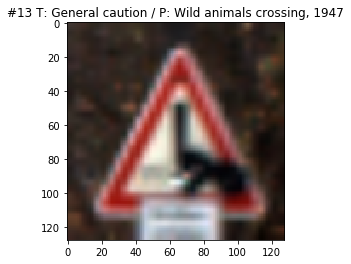

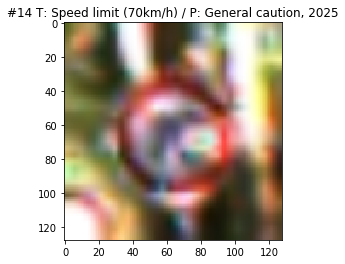

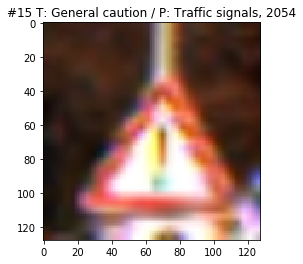

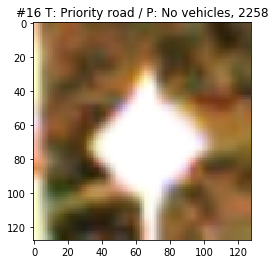

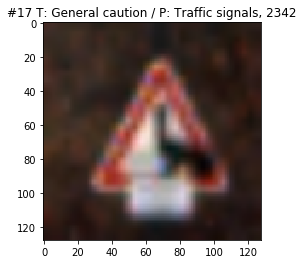

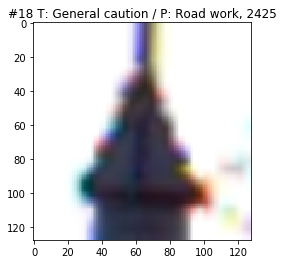

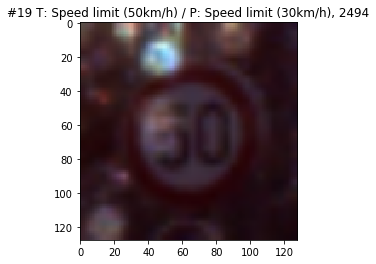

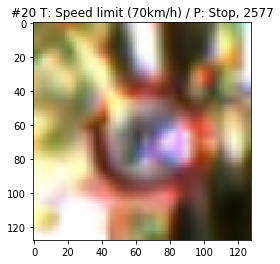

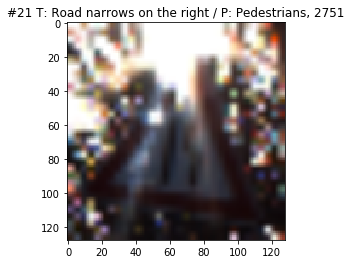

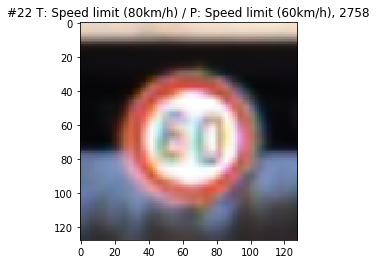

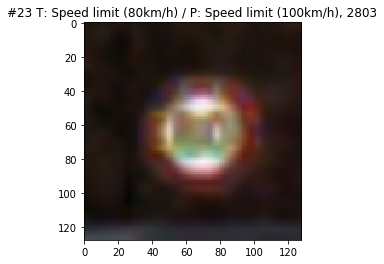

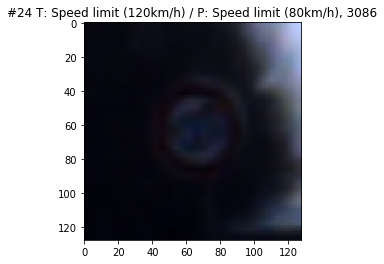

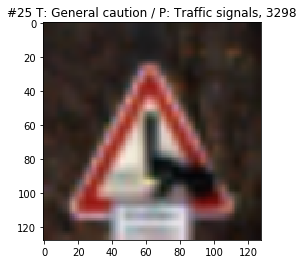

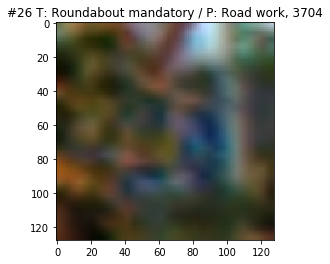

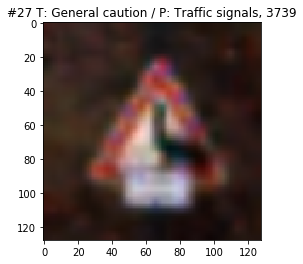

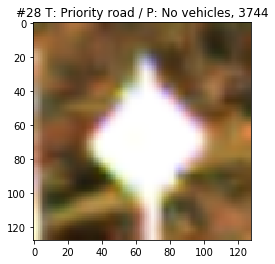

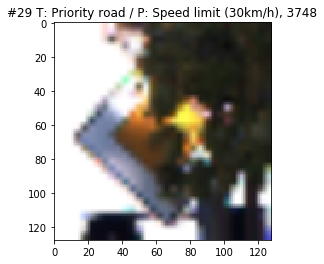

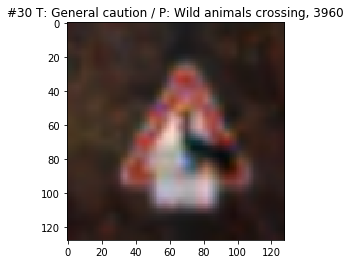

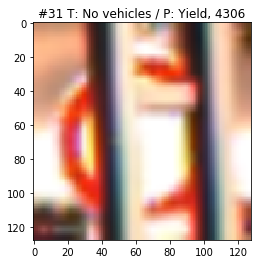

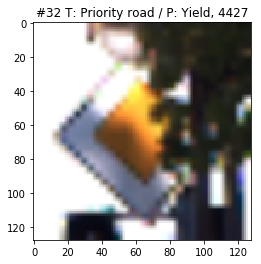

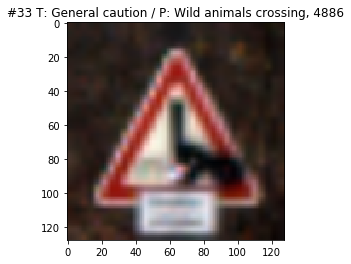

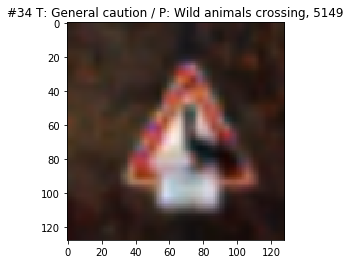

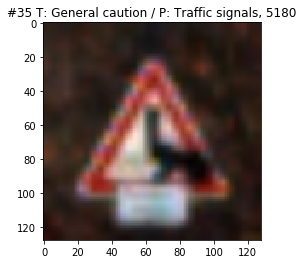

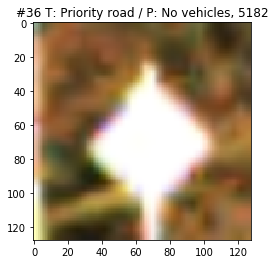

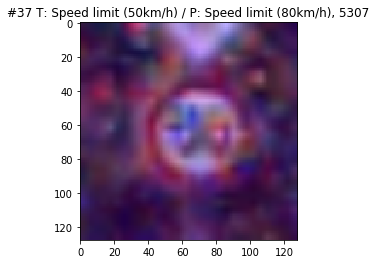

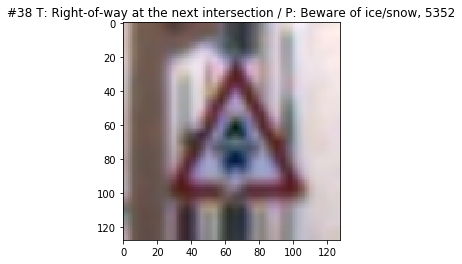

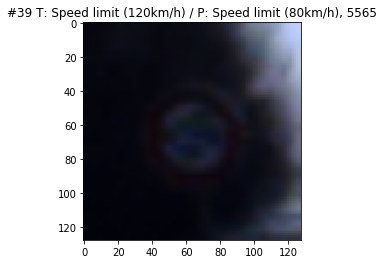

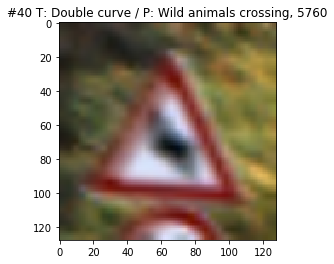

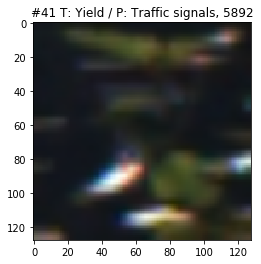

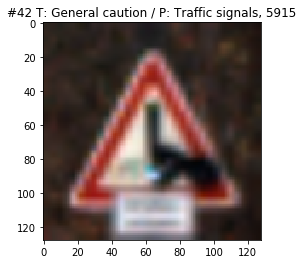

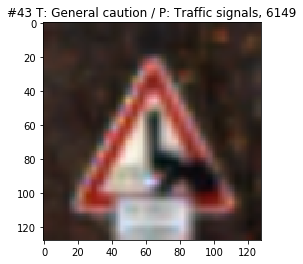

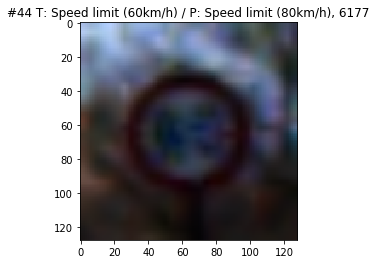

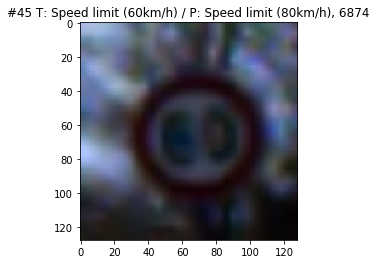

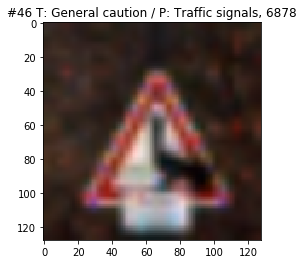

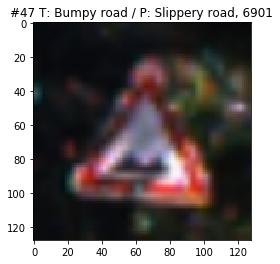

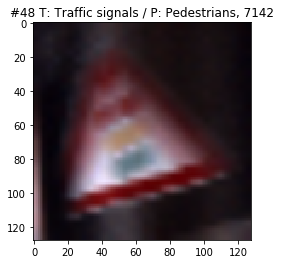

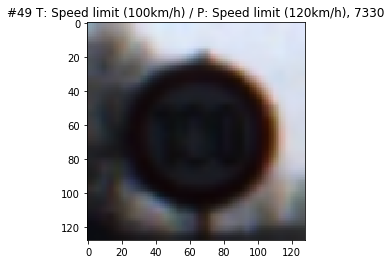

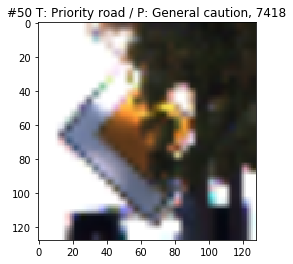

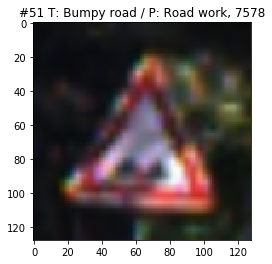

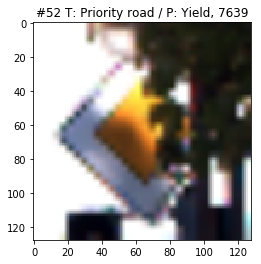

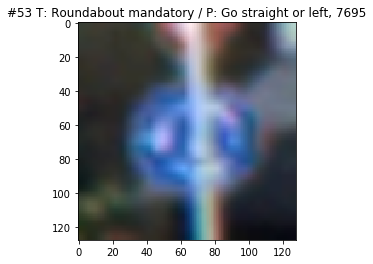

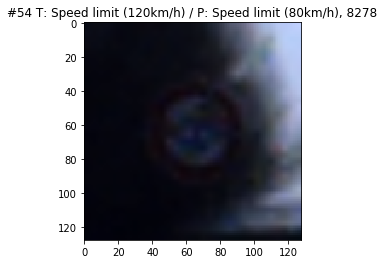

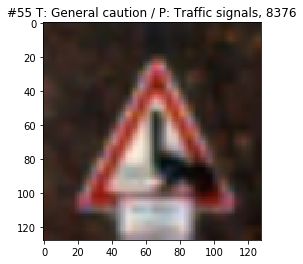

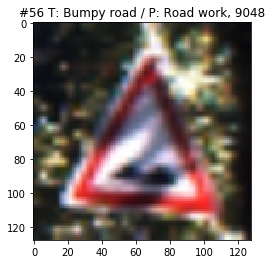

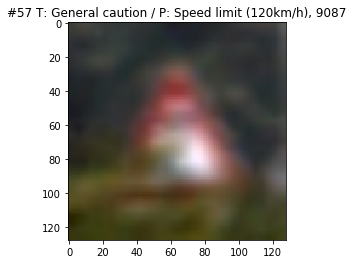

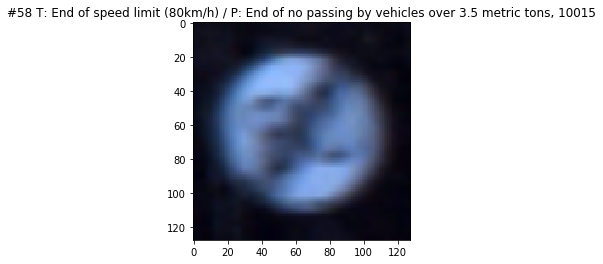

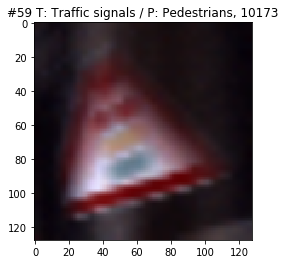

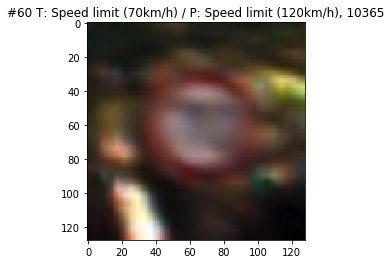

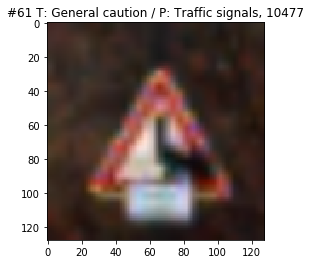

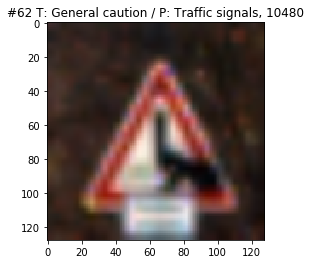

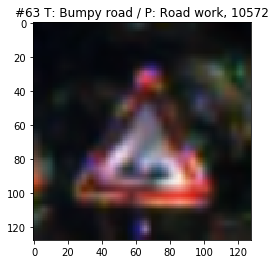

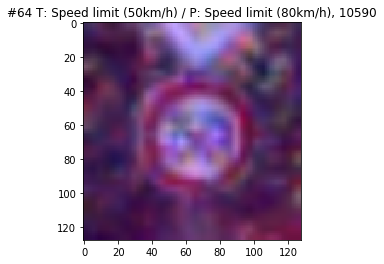

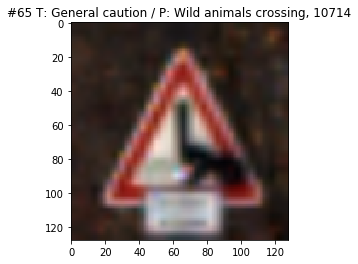

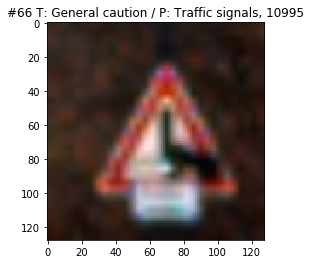

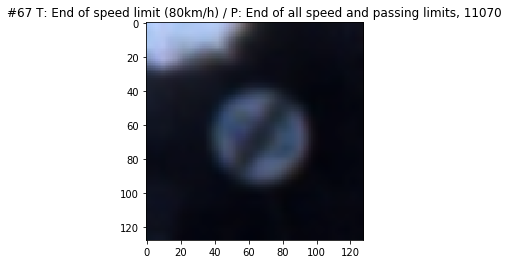

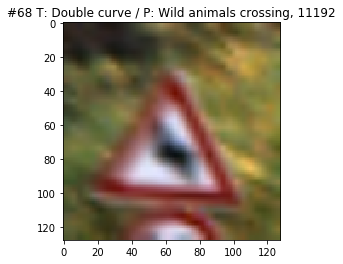

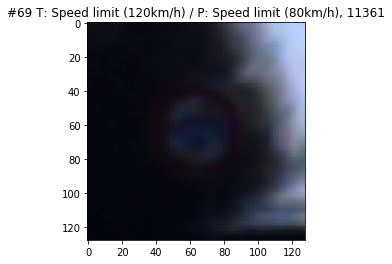

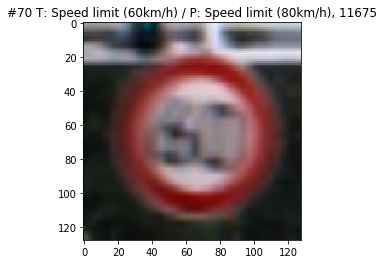

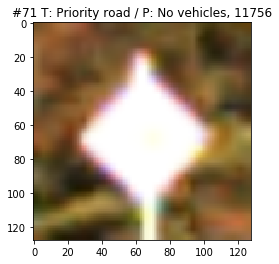

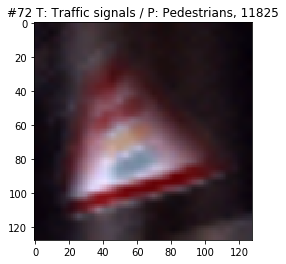

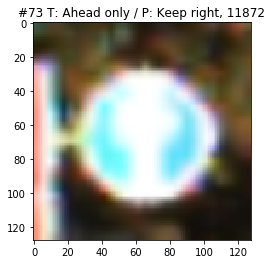

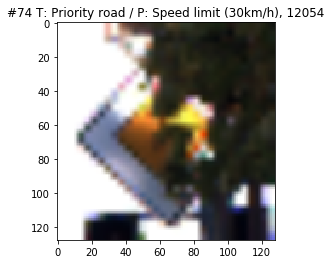

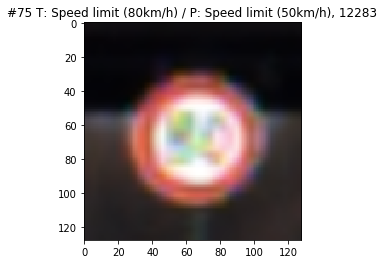

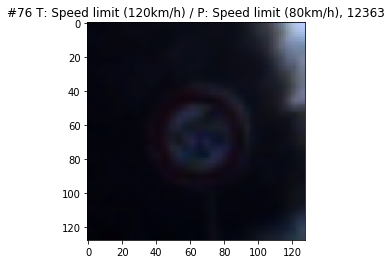

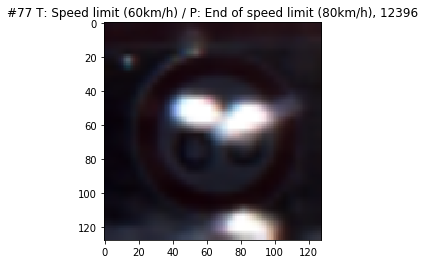

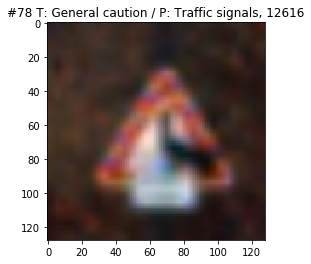

In [23]:
for i, wrong_prediction_index in enumerate(wrong_prediction_indices[:500]):
    img = X_test[wrong_prediction_index]
    plt.figure()
    pred_label = y_pred_label[wrong_prediction_index]
    pred_label_name = sign_names_df.iloc[pred_label]['SignName']
    label = y_test[wrong_prediction_index]
    label_name = sign_names_df.iloc[label]['SignName']
    plt.title("#{} T: {} / P: {}, {}".format(i+1, label_name, pred_label_name, wrong_prediction_index))

    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    plt.imshow(img)
    
plt.show()

# Findings

1. There are 78 misclassified signs
2. 22 images (28%) are extremely low-res and I cannot tell which sign it depicts
3. 22 images (28%) depicting general caution, but sign is damaged and looks like something different
4. 10 images (13%) depicting partially covered traffic signs
5. Other signs contain shadows, sunflares, unfocused etc.

In [24]:
# Check model accuracy against training data

y_train_one_hot = tensorflow.keras.utils.to_categorical(y_train)

print('\n# Evaluate on training data')
results = model.evaluate(pass_data_generator.flow(X_train, y_train_one_hot))
print('train loss, train acc:', results)


# Evaluate on training data
  ...
    to  
  ['...']
1088/1088 [==============================] - 31s 29ms/step - loss: 7.8747e-04 - accuracy: 0.9998
train loss, train acc: [0.00078746775176784, 0.99979883]


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [25]:
import os
from glob import iglob
import pathlib

results = iglob(os.path.join('./data/internet/', '*', '*.jpg'))

X_data = []
y_data = []

for file_name in results:
    path = pathlib.PurePath(file_name)
    y_data.append(int(path.parent.name))

    img = cv2.imread(file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X_data.append(img)

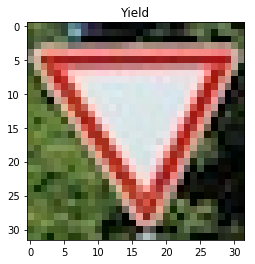

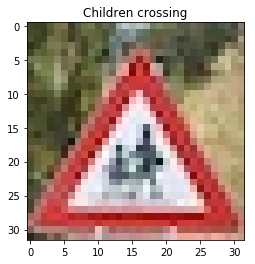

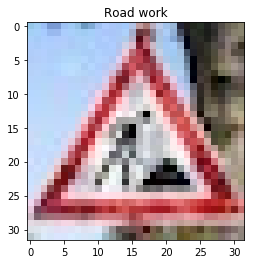

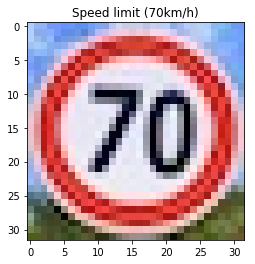

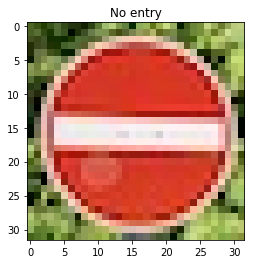

In [26]:
for label, img in zip(y_data, X_data):
    plt.figure()
    label_name = sign_names_df.iloc[label]['SignName']
    plt.title("{}".format(label_name))

    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    plt.imshow(img)
    
plt.show()

### Predict the Sign Type for Each Image

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [28]:
X_data = np.array([cv2.resize(x, (int(image_size),int(image_size))) for x in X_data])

In [29]:
y_data_one_hot = tensorflow.keras.utils.to_categorical(y_data, num_classes=n_classes)

### Analyze Performance

In [30]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [31]:
print('\n# Evaluate on test data')
results = model.evaluate(pass_data_generator.flow(X_data, y_data_one_hot))
print('test loss, test acc:', results)


# Evaluate on test data
  ...
    to  
  ['...']
1/1 [==============================] - 0s 198ms/step - loss: 1.0014e-06 - accuracy: 1.0000
test loss, test acc: [1.0013554856413975e-06, 1.0]


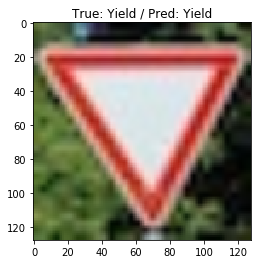

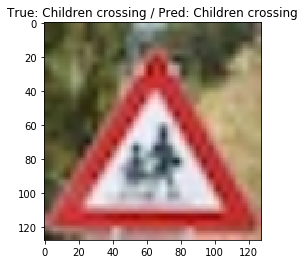

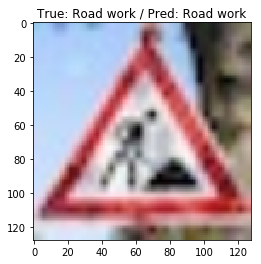

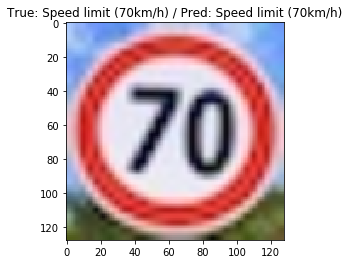

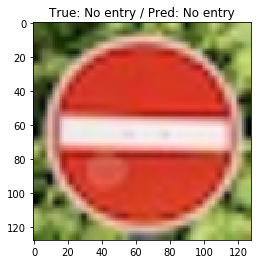

In [32]:
y_data_pred = model.predict(pass_data_generator.flow(x=X_data, y=y_data, shuffle=False))

for img, y_data_true, y_prediction in zip(X_data, y_data, y_data_pred):
    y_pred_label = np.argmax(y_prediction)
    
    plt.figure()
    pred_label_name = sign_names_df.iloc[y_pred_label]['SignName']
    true_label_name = sign_names_df.iloc[y_pred_label]['SignName']
    plt.title("True: {} / Pred: {}".format(true_label_name, pred_label_name))

    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    plt.imshow(img)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [33]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

y_data_pred = model.predict(pass_data_generator.flow(x=X_data, y=y_data, shuffle=False))

for i, (img, y_data_true, y_prediction) in enumerate(zip(X_data, y_data, y_data_pred)):
    y_pred_labels = np.argsort(y_prediction)[::-1][:5]
    
    print("Image: ", i + 1)
    print("Top 5 probabilities: ", y_prediction[y_pred_labels])
    print("Top 5 predicted classes: ", y_pred_labels)
    print()

Image:  1
Top 5 probabilities:  [1. 0. 0. 0. 0.]
Top 5 predicted classes:  [13 42 10 18 17]

Image:  2
Top 5 probabilities:  [1.0000000e+00 7.2966166e-09 3.9927573e-25 4.7588350e-27 2.3865919e-28]
Top 5 predicted classes:  [28 30 29 27 11]

Image:  3
Top 5 probabilities:  [1. 0. 0. 0. 0.]
Top 5 predicted classes:  [25 42 20 18 17]

Image:  4
Top 5 probabilities:  [9.9999487e-01 5.0199542e-06 5.3587989e-08 2.1293225e-09 3.3767203e-10]
Top 5 predicted classes:  [ 4  0  1 19  7]

Image:  5
Top 5 probabilities:  [1. 0. 0. 0. 0.]
Top 5 predicted classes:  [17 42 10 18 16]



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [34]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [35]:
layer_outputs = [layer.output for layer in model.layers]

In [36]:
activation_model = tensorflow.keras.models.Model(inputs=model.input, outputs=layer_outputs) 

In [37]:
image_id = 2758

activations = activation_model.predict(np.array([X_test[image_id]])) 

/home/vmihaylov/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


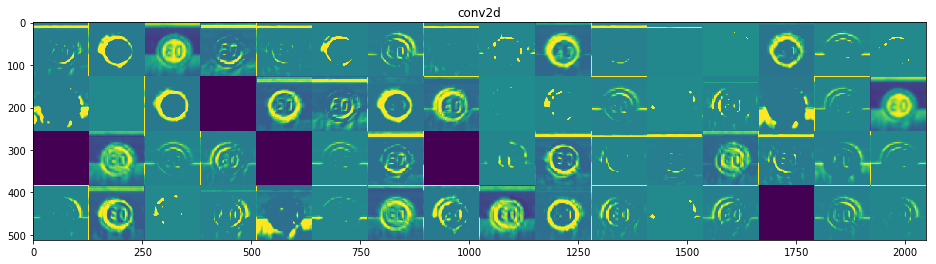

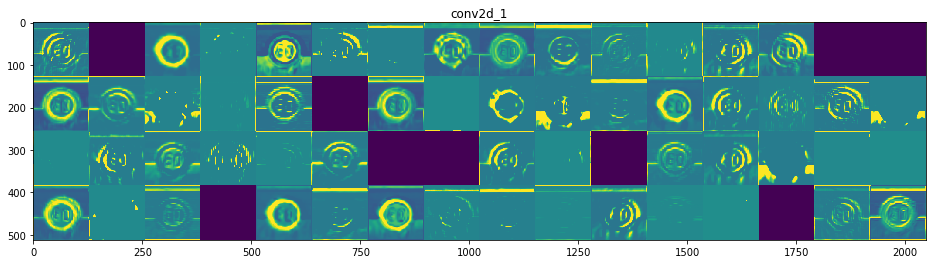

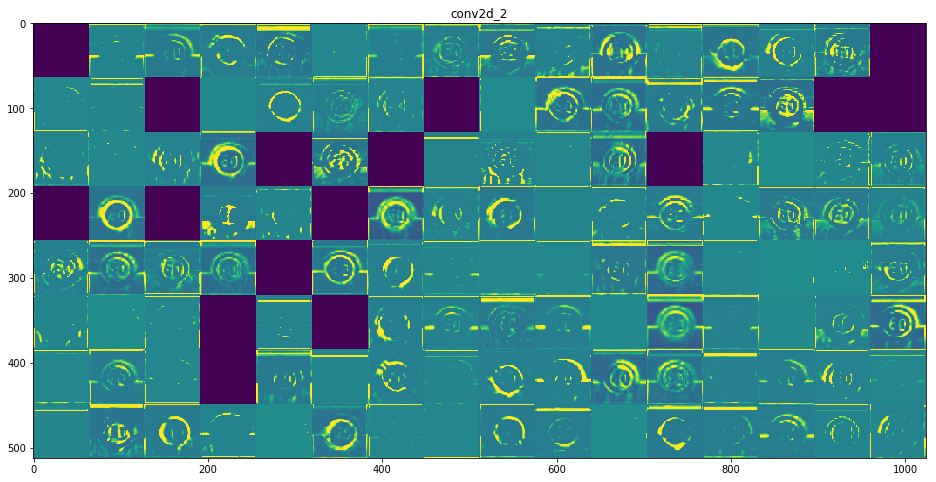

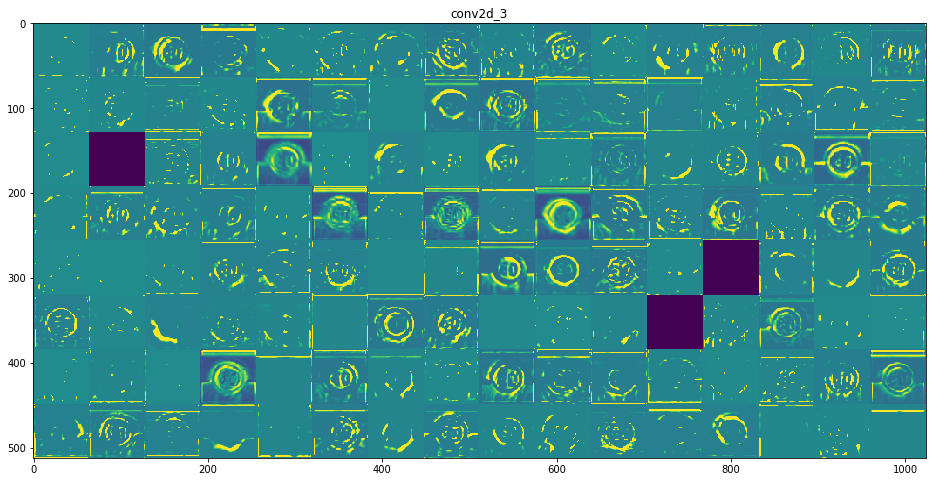

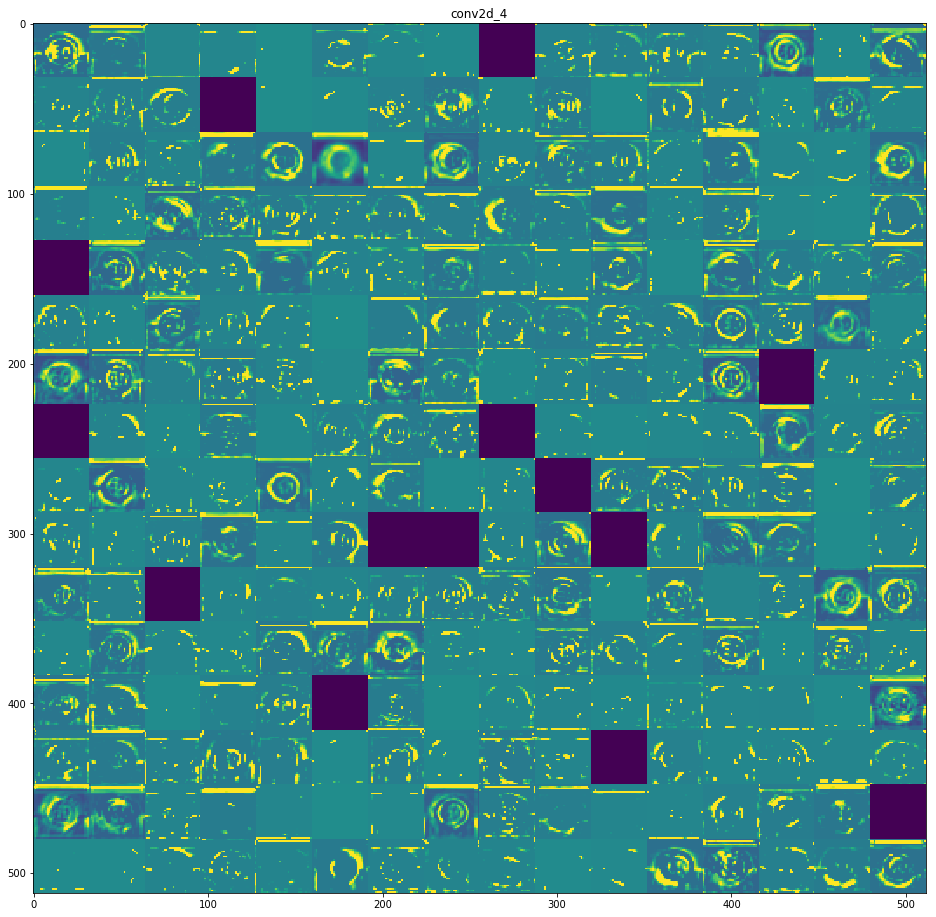

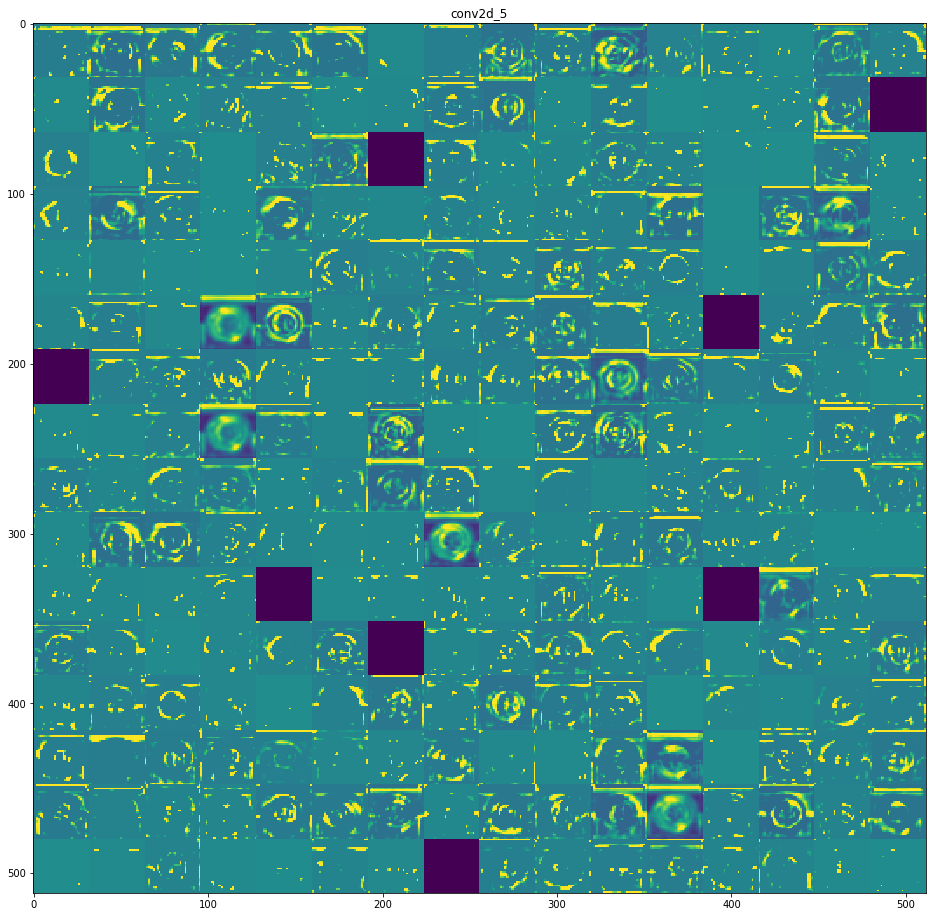

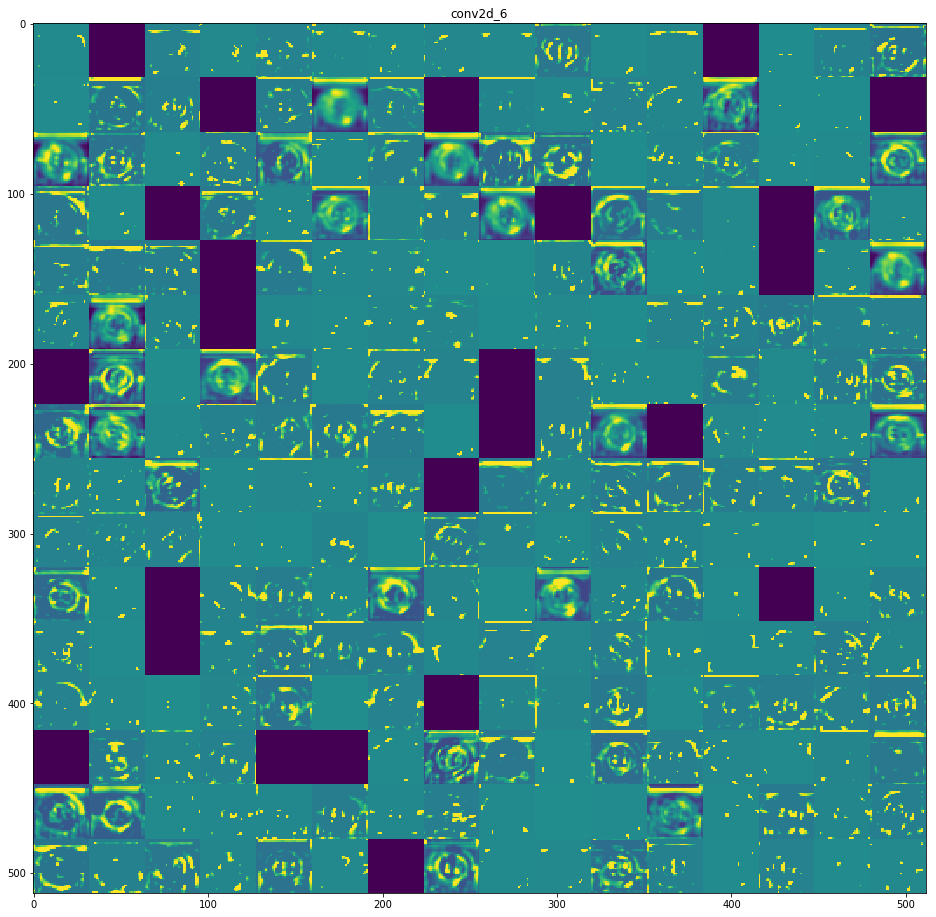

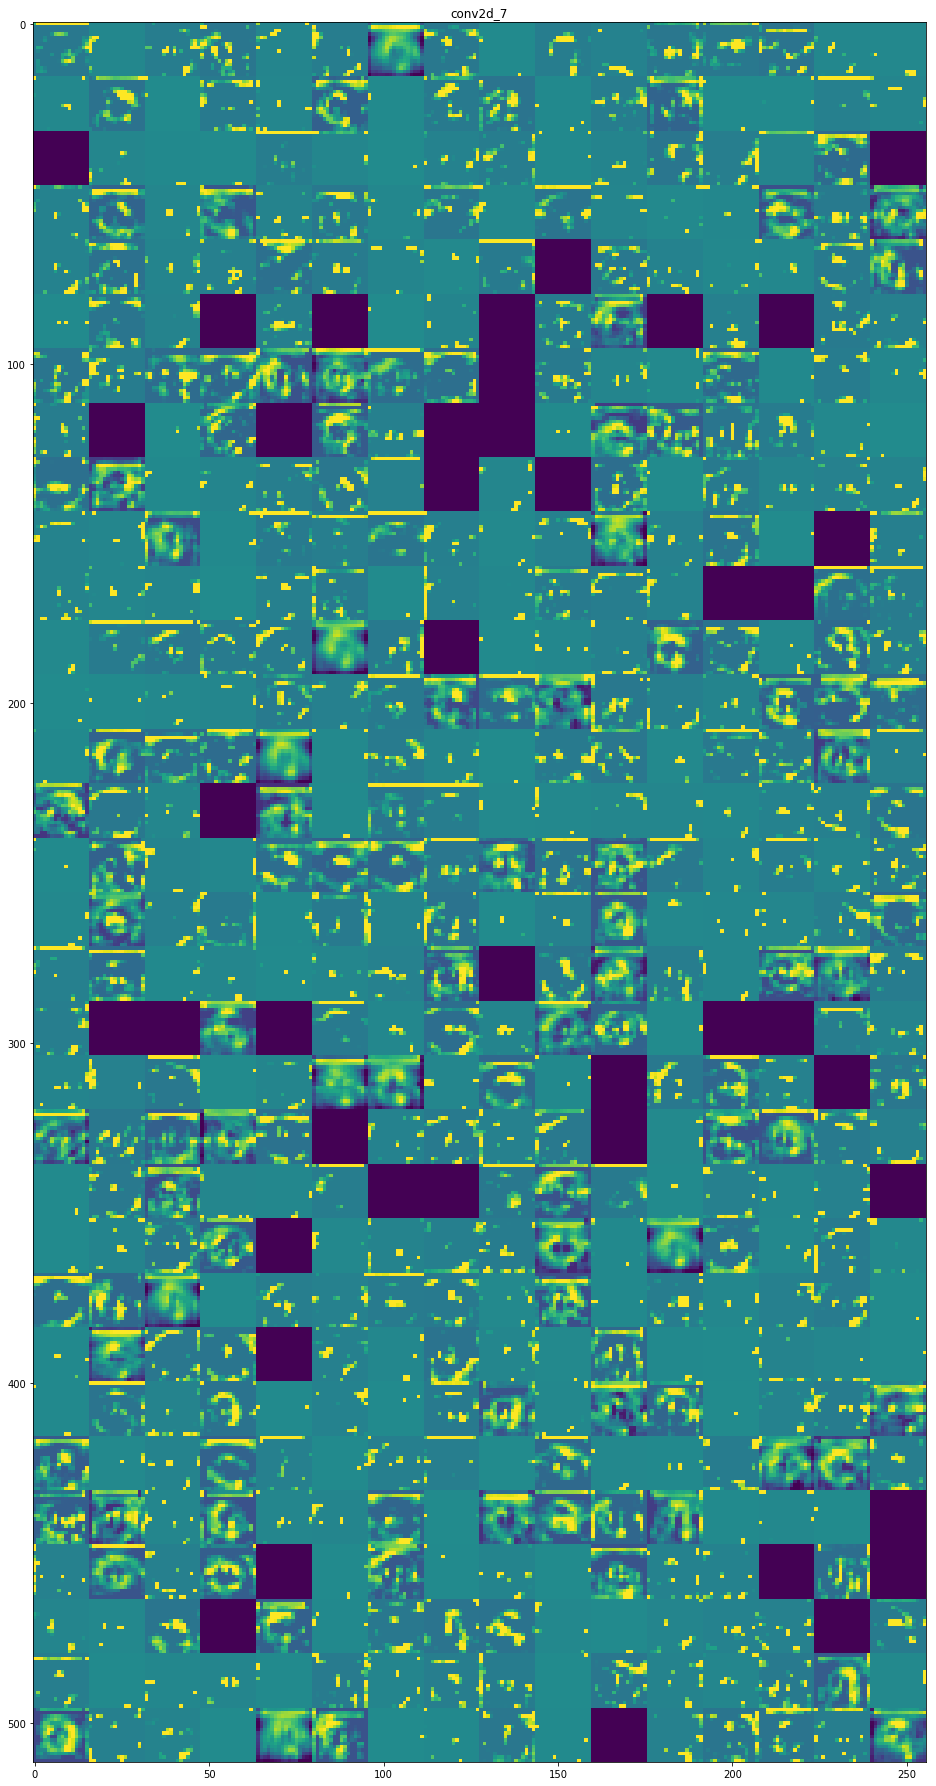

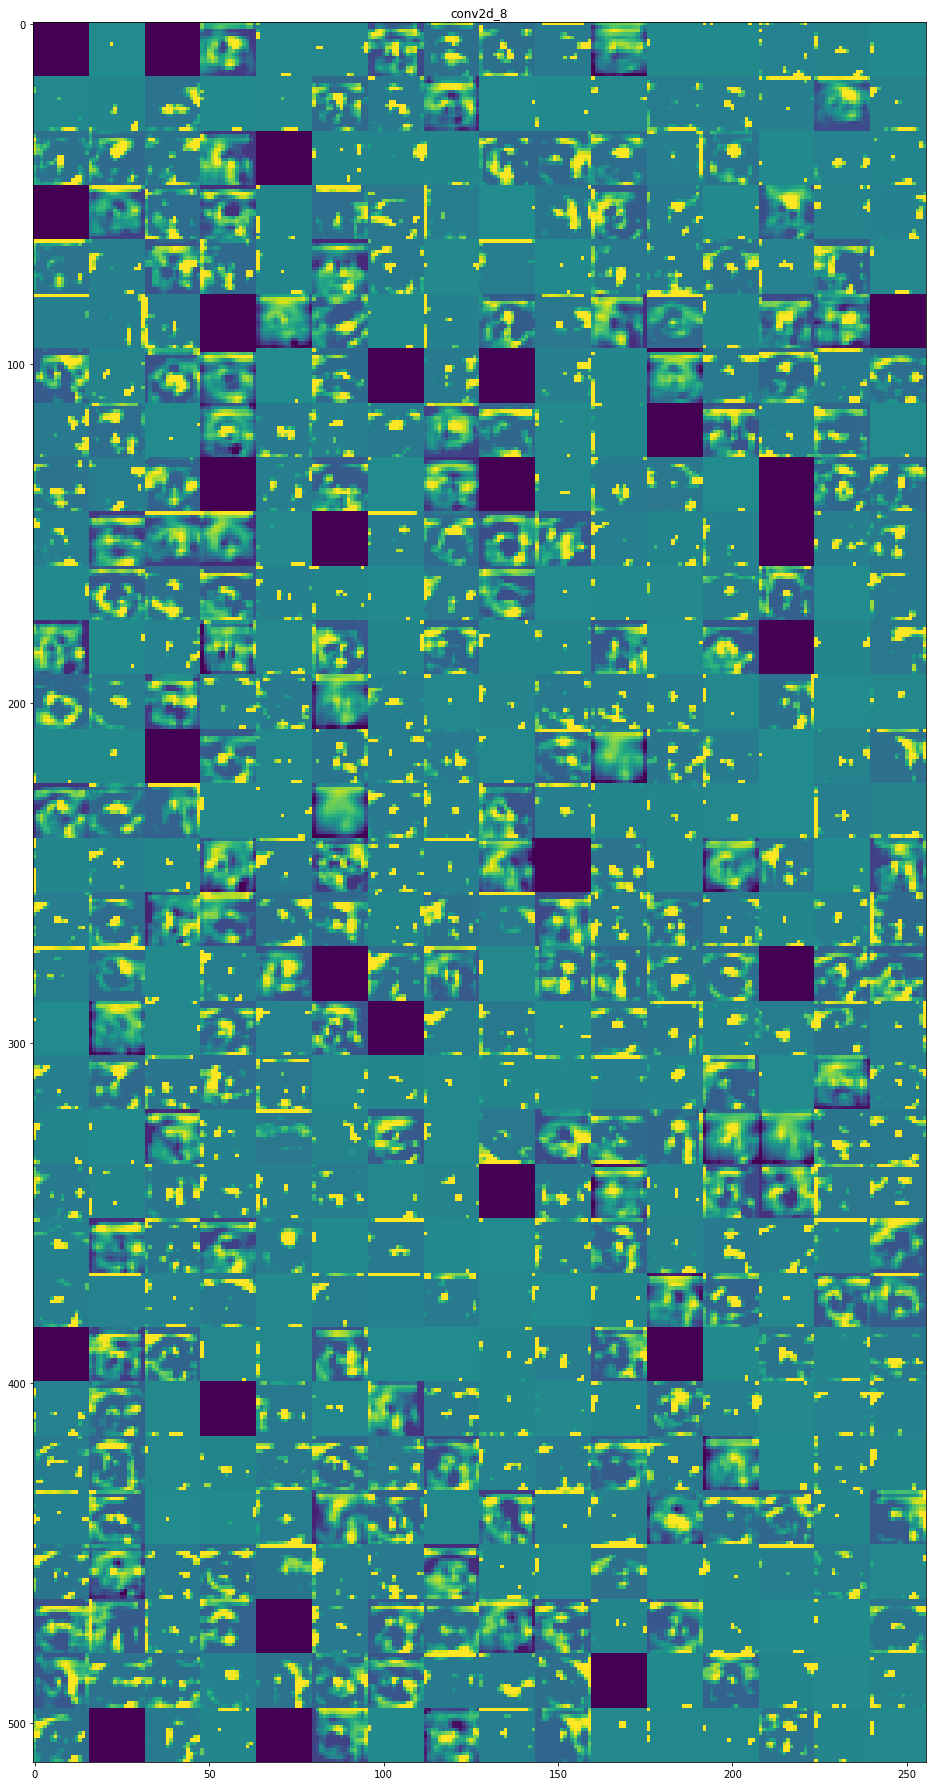

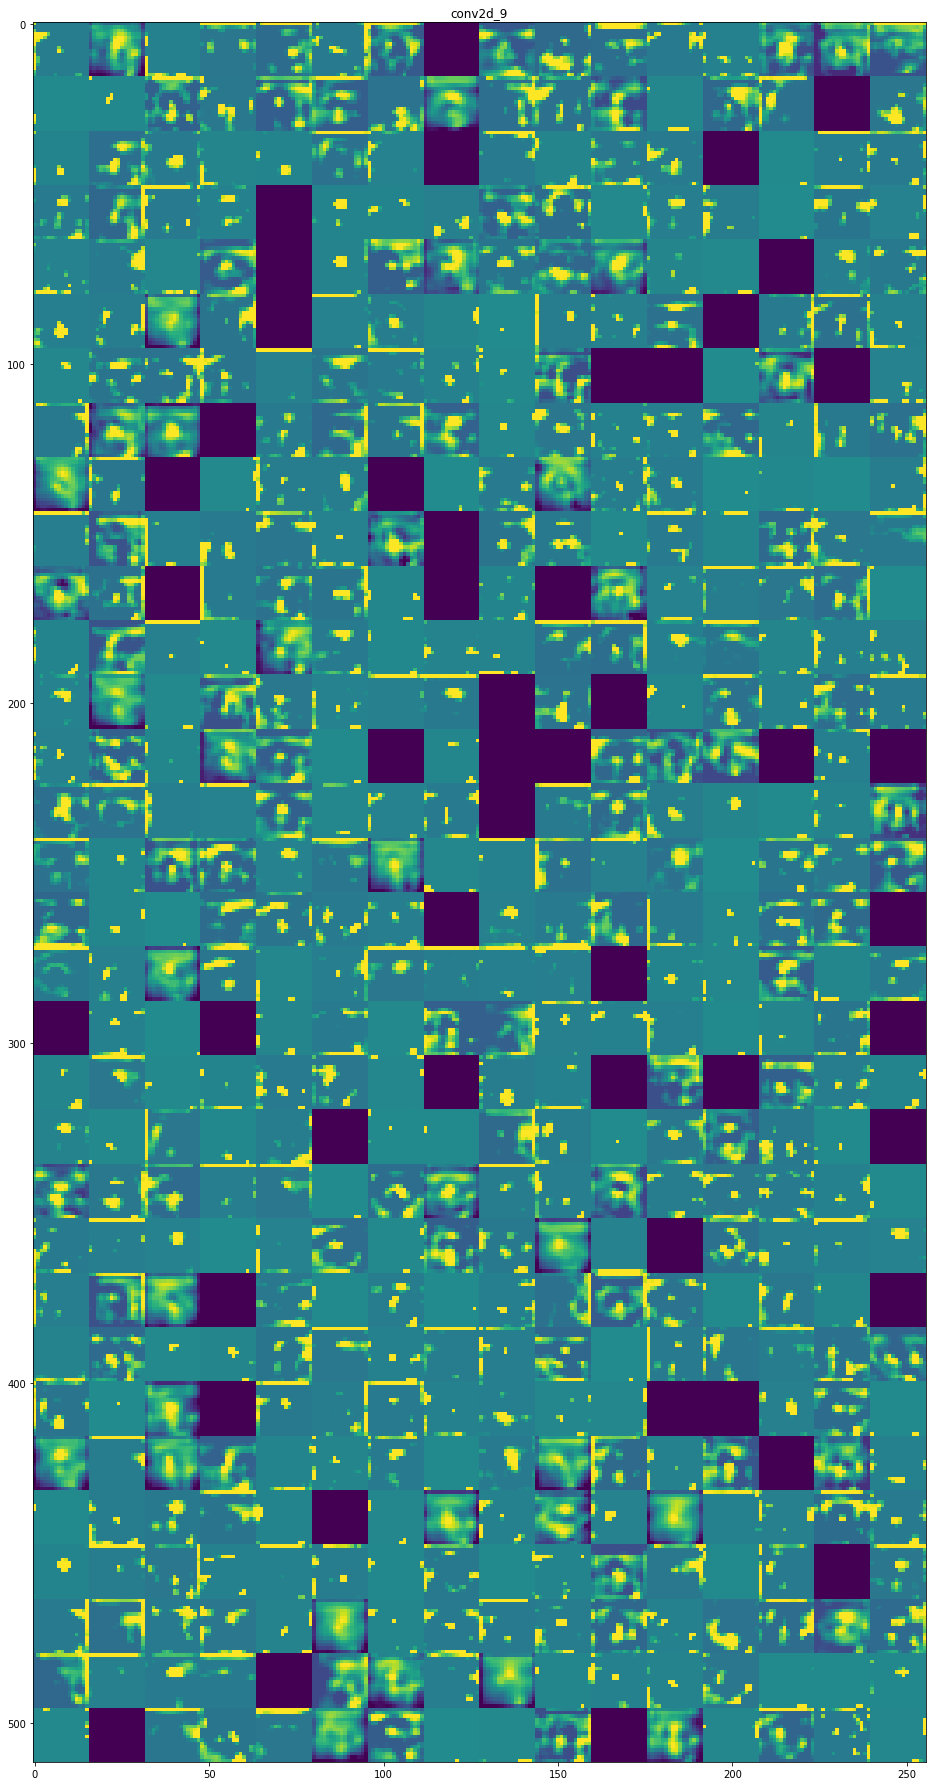

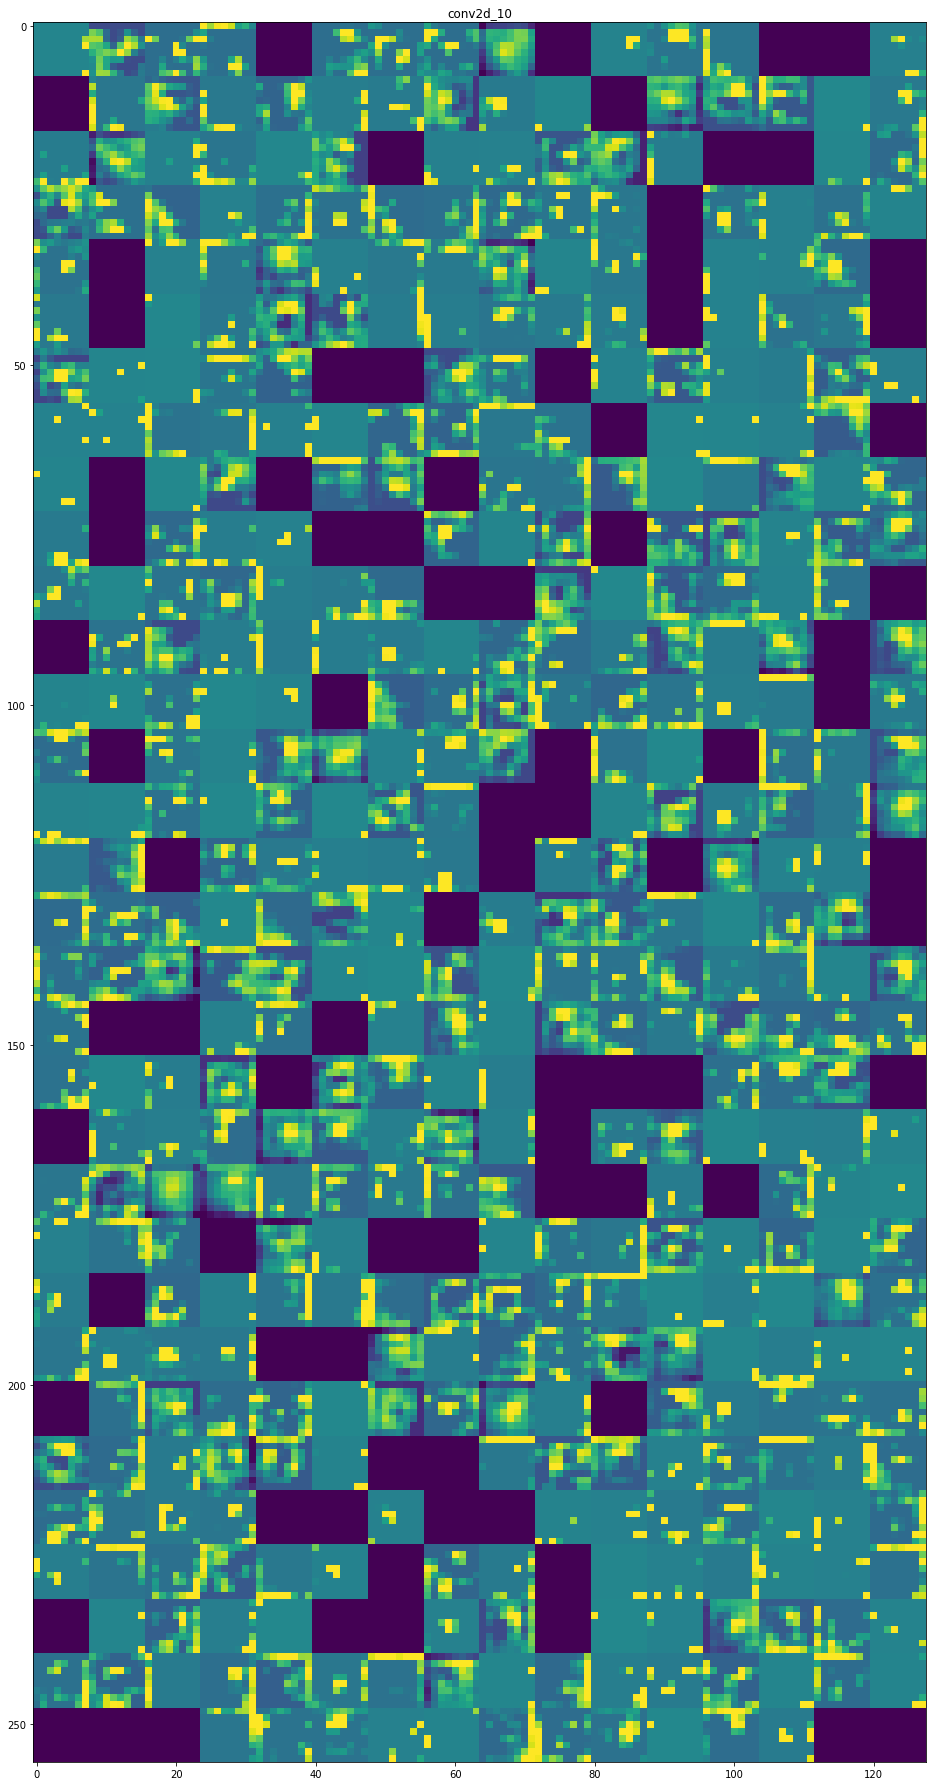

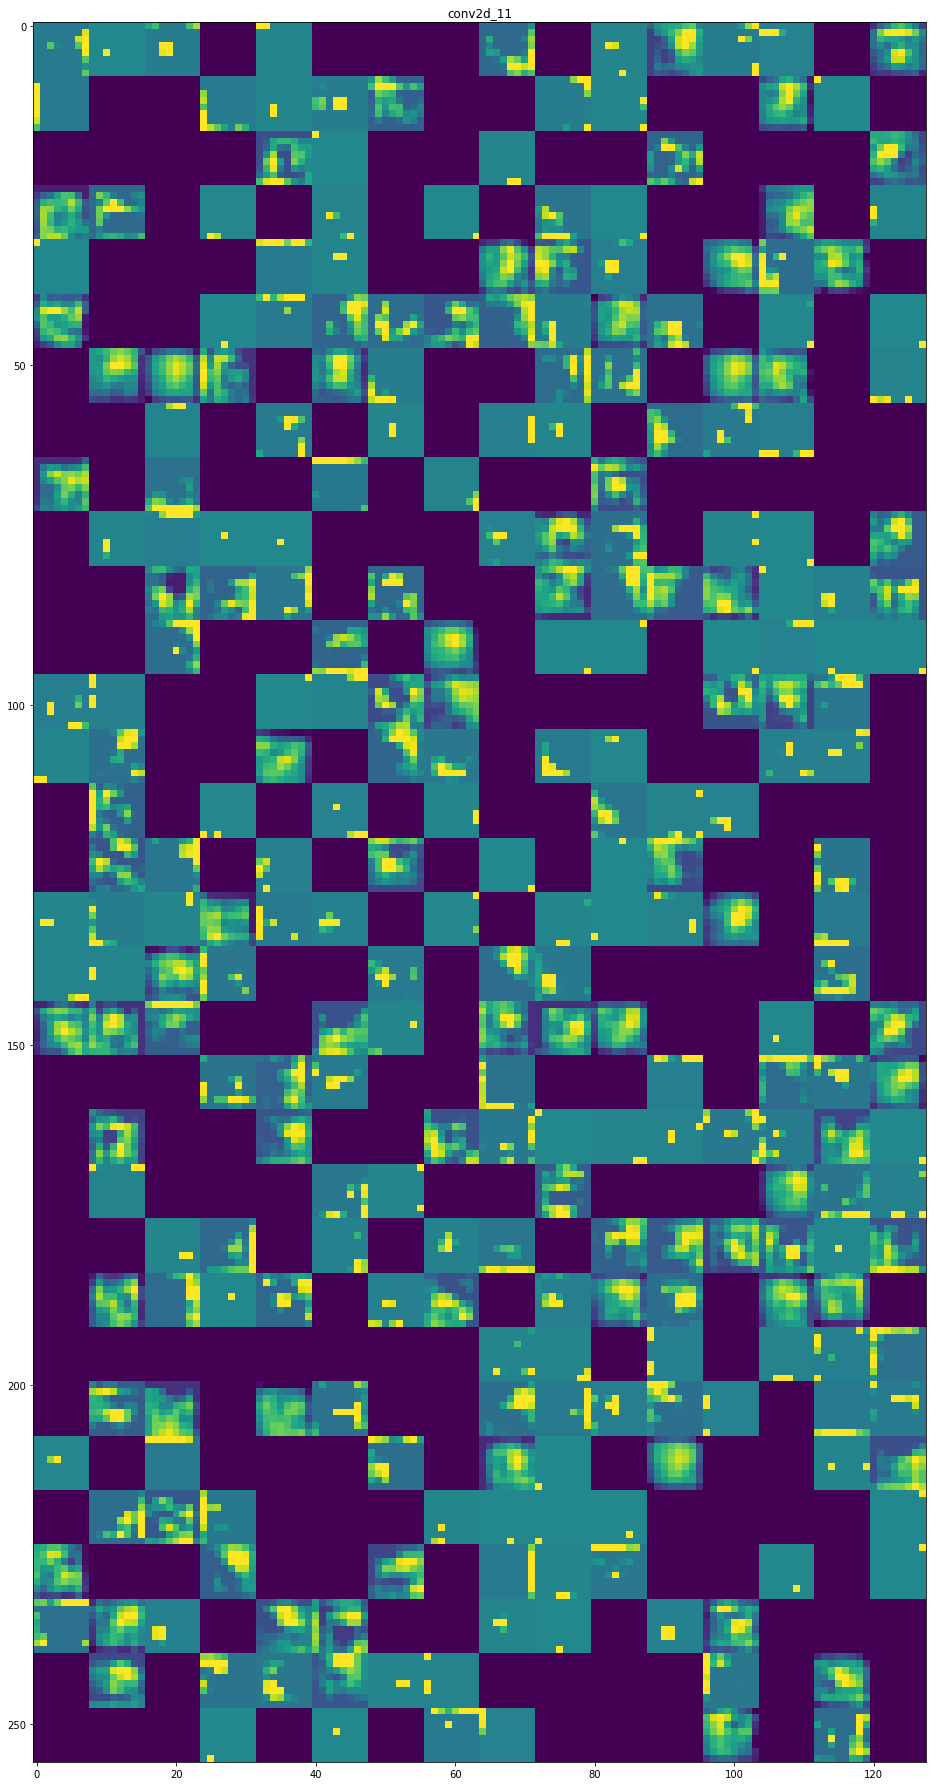

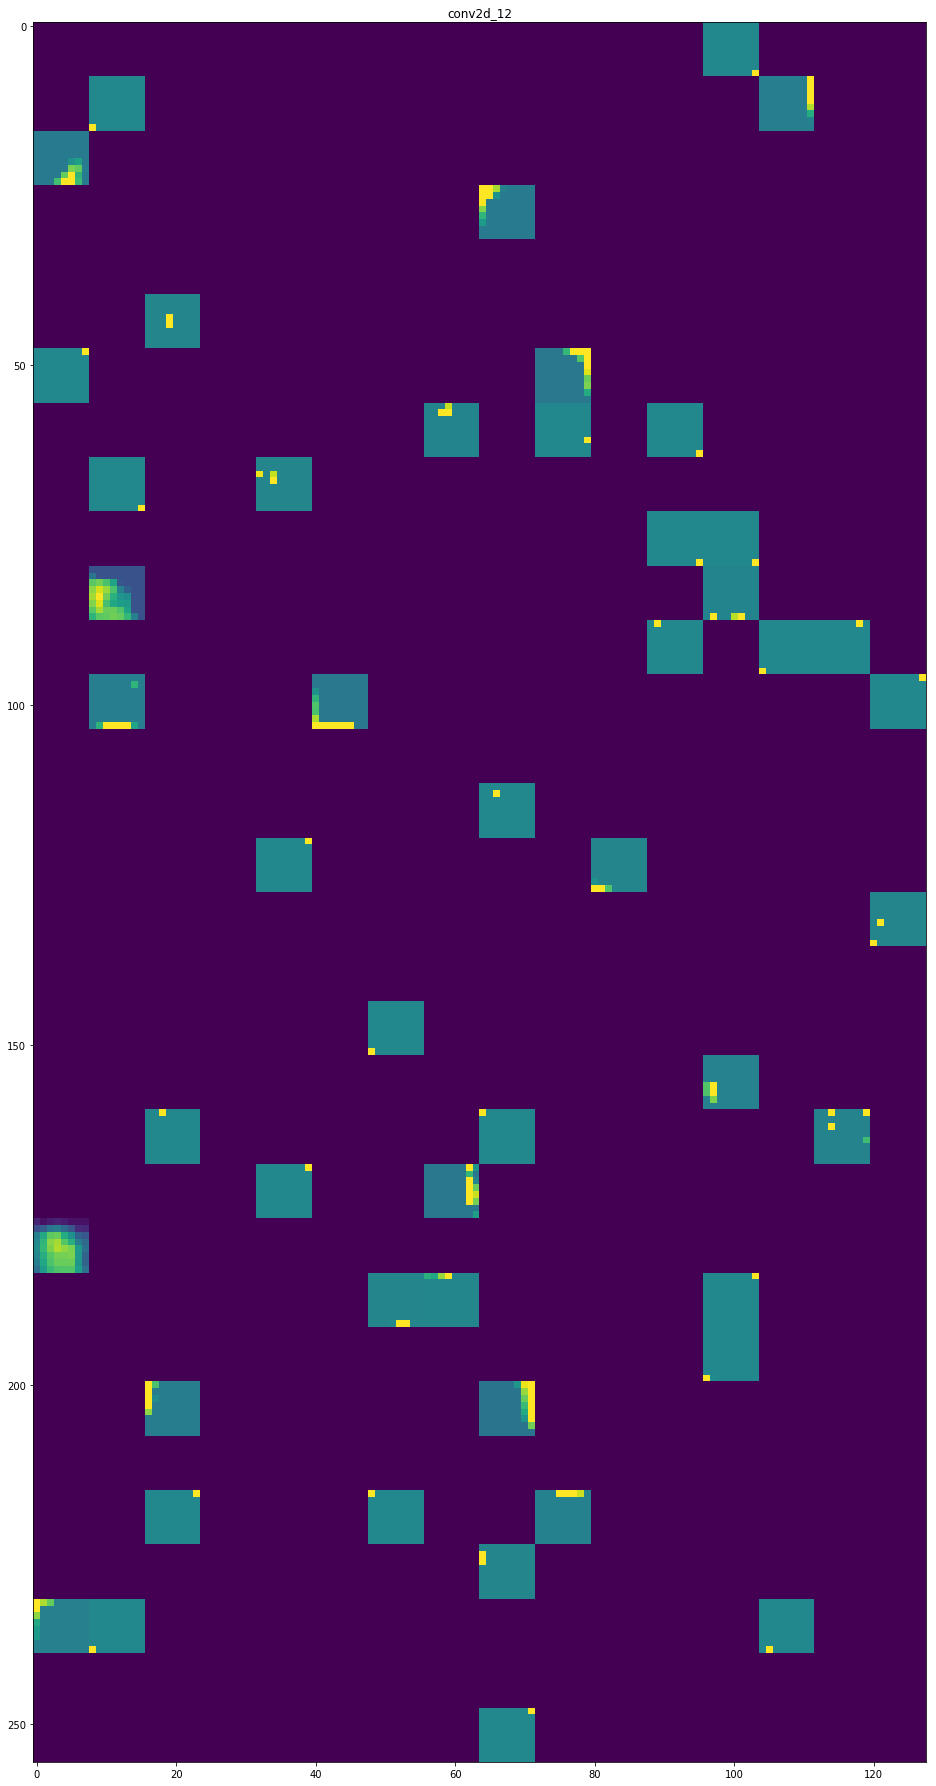

In [38]:
images_per_row = 16

for layer, layer_activation in zip(model.layers, activations): # Displays the feature maps
    
    layer_name = layer.name
    
    if isinstance(layer, tensorflow.keras.layers.Conv2D) or isinstance(layer, tensorflow.keras.layers.SeparableConv2D):
        n_features = layer_activation.shape[-1] # Number of features in the feature map
        size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
        n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols): # Tiles each filter into a big horizontal grid
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, # Displays the grid
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')